# Проект: Прогнозирование оттока клиентов оператора связи «ТелеДом»

# Описание проекта

Оператор связи «ТелеДом» стремится снизить отток клиентов, предлагая промокоды и специальные условия для пользователей, которые планируют отказаться от услуг связи. Для этого необходима нужна модель, которая будет предсказывать, разорвёт ли абонент договор. Команда собрала персональные данные клиентов и информацию об их тарифах и услугах. Ваша задача — обучить модель на этих данных для прогноза оттока клиентов.

# Описание услуг

«ТелеДом» предоставляет следующие основные услуги:

1. **Стационарная телефонная связь**:
   - Возможность подключения нескольких линий одновременно.

2. **Интернет**:
   - Два типа подключения:
     - **DSL** (Digital Subscriber Line) — через телефонную линию.
     - **Оптоволоконный кабель** (Fiber optic).

# Дополнительные услуги:
- **Интернет-безопасность**:
  - Антивирус (DeviceProtection).
  - Блокировка небезопасных сайтов (OnlineSecurity).
- **Техническая поддержка** (TechSupport).
- **Облачное хранилище** (OnlineBackup) для резервного копирования данных.
- **Стриминговое телевидение** (StreamingTV) и каталог фильмов (StreamingMovies).

Клиенты могут оплачивать услуги ежемесячно или заключать долгосрочные договоры на 1–2 года с возможностью различных способов оплаты и получения электронного чека.

# Описание данных

Данные состоят из нескольких файлов, полученных из разных источников:

1. **contract_new.csv** — информация о договорах:
   - **customerID**: идентификатор абонента.
   - **BeginDate**: дата начала действия договора.
   - **EndDate**: дата окончания действия договора.
   - **Type**: тип оплаты.
   - **PaperlessBilling**: использование электронного расчётного листа.
   - **PaymentMethod**: тип платежа.
   - **MonthlyCharges**: ежемесячные расходы абонента.
   - **TotalCharges**: общие расходы абонента.
   

2. **personal_new.csv** — персональные данные клиента:
   - **customerID**: идентификатор пользователя.
   - **gender**: пол (мужской/женский).
   - **SeniorCitizen**: является ли абонент пенсионером.
   - **Partner**: есть ли у абонента супруг или супруга.
   - **Dependents**: есть ли у абонента дети.
   

3. **internet_new.csv** — информация об интернет-услугах:
   - **customerID**: идентификатор пользователя.
   - **InternetService**: тип подключения.
   - **OnlineSecurity**: наличие блокировки опасных сайтов.
   - **OnlineBackup**: наличие облачного хранилища.
   - **DeviceProtection**: наличие антивируса.
   - **TechSupport**: наличие выделенной линии технической поддержки.
   - **StreamingTV**: наличие стримингового телевидения.
   - **StreamingMovies**: наличие каталога фильмов.


4. **phone_new.csv** — информация об услугах телефонии:
   - **customerID**: идентификатор пользователя.
   - **MultipleLines**: возможность подключения телефона к нескольким линиям.

Во всех файлах столбец **customerID** содержит уникальный код клиента. Информация о договорах актуальна на 1 февраля 2020 года.

# План работы

**Шаг 1: Загрузка данных**
- Загрузить данные из файлов и выполнить первичный осмотр.

**Шаг 2: Исследовательский анализ и предобработка данных**
- Выполнить исследовательский анализ каждого датафрейма.
- Проверить наличие пропусков и аномалий.

**Шаг 3: Объединение данных**
- Объединить данные из всех файлов в один датафрейм по ключу **customerID**.

**Шаг 4: Анализ объединённого датафрейма**
- Исследовать объединённый датафрейм, визуализировать распределения признаков и провести корреляционный анализ.
- Генерировать новые признаки, если это необходимо.

**Шаг 5: Подготовка данных**
- Подготовить данные для обучения модели, включая:
  - Разделение на обучающую итестовую выборки.
  - Масштабирование и кодирование признаков с учётом особенностей данных.

**Шаг 6: Обучение моделей машинного обучения**
- Обучить как минимум две модели.
  
- Подобрать гиперпараметры для хотя бы одной из моделей.

**Шаг 7: Выбор лучшей модели**
- Оценить качество обученных моделей на тестовой выборке.

**Шаг 8: Общий вывод и рекомендации**
- Подвести итоги проделанной работы, изложить основные этапы и полученные результаты. Включить в отчёт:
  - Описание выбранной модели и её характеристик.
  - Рекомендации для бизнеса по снижению оттока клиентов на основе анализа данных и предсказаний модели.



## Шаг 1: Загрузка данных

In [1]:
!pip install phik -q
#!pip install catboost -q
#!pip install lightgbm -q
#!pip install xgboost -q
#Код ментора
!pip install scikit-learn==1.1.3

In [2]:
import warnings
import time
from tqdm import tqdm, notebook
tqdm.pandas()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix
from sqlalchemy import create_engine
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (precision_score, recall_score, f1_score, roc_auc_score,
                             classification_report, roc_curve, confusion_matrix,
                             accuracy_score, make_scorer)
from sklearn.model_selection import train_test_split, GridSearchCV
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import xgboost
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import StratifiedKFold

In [3]:
RANDOM_STATE = 130125

In [4]:
def analyze(df, name):
    """
    Функция для анализа датафрейма
    :param df: датафрейм для анализа
    :param name: имя датафрейма
    """
    print(f"\nАнализ DataFrame: {name}\n")
    
    # 1. Общая информация о DataFrame
    print("Общая информация:")
    display(df.head())
    display(df.info())

    # 2. Описательная статистика
    print("Описательная статистика:")
    display(df.describe(include='all'))

    # 3. Анализ по каждому столбцу
    for col in df.columns:
        print('-' * 30)
        print(f"Анализ столбца: {col}")

        # 3.1 Тип данных и количество уникальных значений
        dtype = df[col].dtype
        num_unique = df[col].nunique()
        print(f"Тип данных: {dtype}, Количество уникальных значений: {num_unique}")

        # 3.2 Уникальные значения (отсортированные) - вывод только если мало уникальных значений
        if num_unique <= 20:
            unique_values = df[col].sort_values().unique()
            print(f"Уникальные значения: {unique_values}")
        elif num_unique <= 50:  # Вывод первых и последних 10 значений, если их не слишком много
            unique_values = df[col].sort_values().unique()
            print(f"Первые 10 уникальных значений: {unique_values[:10]}")
            print(f"Последние 10 уникальных значений: {unique_values[-10:]}")

        # 3.3 Количество и процент пропущенных значений (NaN, None)
        num_missing = df[col].isnull().sum()
        percent_missing = round(df[col].isnull().mean() * 100, 2)
        print(f"Количество пропущенных значений (NaN, None): {num_missing}, Процент: {percent_missing}%")

        # 3.4 Количество и процент нулевых значений - только для числовых
        if pd.api.types.is_numeric_dtype(dtype):
            num_zeros = (df[col] == 0).sum()
            percent_zeros = round(num_zeros / len(df) * 100, 2)
            print(f"Количество 0: {num_zeros}, Процент 0: {percent_zeros}%")

        # 3.5 Проверка пропусков для текстовых столбцов (пустые строки и пробелы)
        if pd.api.types.is_string_dtype(dtype):
            num_empty = (df[col] == "").sum() + (df[col] == " ").sum()
            percent_empty = round(num_empty / len(df) * 100, 2)
            print(f"Количество пустых строк и пробелов: {num_empty}, Процент: {percent_empty}%")

        print('-' * 30, "\n")

    # 4. Проверка полных дублей
    num_duplicates = df.duplicated().sum()
    percent_duplicates = round(num_duplicates / len(df) * 100, 2)
    print(f"Количество полных дублей: {num_duplicates}, Процент полных дублей: {percent_duplicates}%")

In [5]:
# функция, для создания графиков распределений 
def optimal_bins(data):
    """Вычисляет оптимальное количество корзин для гистограммы по правилу Стерджена."""
    n = len(data)
    return int(np.ceil(np.sqrt(n)))

In [6]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [7]:
# Функция для построения гистограмм и ящиков с усами
def plot_numerical_features(df, features):
    for feature in features:
        plt.figure(figsize=(12, 5))
        
        # Гистограмма
        plt.subplot(1, 2, 1)
        sns.histplot(df[feature], bins=30, kde=True, color='skyblue')
        plt.title(f'Гистограмма: {feature}')
        plt.xlabel(feature)
        plt.ylabel('Частота')
        
        # Вычисление среднего и медианы
        mean_value = df[feature].mean()
        median_value = df[feature].median()
        
        # Отображение среднего и медианы на гистограмме
        plt.axvline(mean_value, color='red', linestyle='--', label=f'Среднее: {mean_value:.2f}')
        plt.axvline(median_value, color='orange', linestyle='-', label=f'Медиана: {median_value:.2f}')
        
        # Легенда для гистограммы
        plt.legend()
        
        # Ящик с усами
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[feature], color='lightgreen')
        plt.title(f'Ящик с усами: {feature}')
        
        # Отображение среднего и медианы на ящике с усами
        plt.axvline(mean_value, color='red', linestyle='--', label=f'Среднее: {mean_value:.2f}')
        plt.axvline(median_value, color='orange', linestyle='-', label=f'Медиана: {median_value:.2f}')
        
        # Легенда для ящика с усами
        plt.legend()
        
        plt.tight_layout()
        plt.show()

In [8]:
# Функция для построения графиков для категориальных признаков с цветами неба
def plot_categorical_features(df, features):
    n_features = len(features)
    n_cols = 3  # Количество колонок для графиков
    n_rows = (n_features // n_cols) + (n_features % n_cols > 0)  # Вычисляем количество строк

    plt.figure(figsize=(5 * n_cols, 5 * n_rows))  # Устанавливаем размер фигуры

    for i, feature in enumerate(features):
        plt.subplot(n_rows, n_cols, i + 1)  # Создаем подграфик
        sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette='Blues')
        plt.title(f'Распределение по признаку: {feature}')
        plt.xlabel(feature)
        plt.ylabel('Количество')
        plt.xticks(rotation=45)

    plt.tight_layout()  # Автоматически подгоняем подграфики
    plt.show()

In [9]:
# Функция для построения круговых диаграмм для категориальных признаков
def plot_categorical_features_pie(df, features):
    n_features = len(features)
    n_cols = 3  # Количество колонок для графиков
    n_rows = (n_features // n_cols) + (n_features % n_cols > 0)  # Вычисляем количество строк

    plt.figure(figsize=(5 * n_cols, 5 * n_rows))  # Устанавливаем размер фигуры

    for i, feature in enumerate(features):
        plt.subplot(n_rows, n_cols, i + 1)  # Создаем подграфик
        counts = df[feature].value_counts()  # Получаем количество значений для каждого признака
        colors = sns.color_palette("Blues", n_colors=len(counts))  # Используем палитру "Blues"
        plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
        plt.title(f'Распределение по признаку: {feature}')
        plt.axis('equal')  # Чтобы круговая диаграмма была кругом

    plt.tight_layout()  # Автоматически подгоняем подграфики
    plt.show()


In [10]:
# Функция для построения графиков по временным меткам
def plot_time_series(df, date_column, title):
    plt.figure(figsize=(16, 8))
    
    # Подсчет количества записей по месяцам
    monthly_counts = df[date_column].dt.to_period('M').value_counts().sort_index()
    
    # Построение графика
    monthly_counts.plot(kind='bar', color='skyblue')
    plt.title(title)
    plt.xlabel('Дата')
    plt.ylabel('Количество записей')
    plt.xticks(rotation=90)
    plt.show()
    

In [11]:
def report_removed_data(data):
    """
    Функция для отчета о количестве удаленных записей в DataFrame.
    
    :param initial_count: Исходное количество записей
    :param cleaned_data: Очищенный DataFrame
    """
    # Исходное количество записей
    initial_count = 7043 

    # Количество записей после удаления
    cleaned_count = len(data)

    # Количество удаленных записей
    removed_count = initial_count - cleaned_count

    # Доля удаленных данных
    removed_percentage = (removed_count / initial_count) * 100

    # Вывод результатов
    print(f"Исходное количество записей: {initial_count}")
    print(f"Количество записей после удаления: {cleaned_count}")
    print(f"Количество удаленных записей: {removed_count}")
    print(f"Доля удаленных данных: {removed_percentage:.2f}%")

In [12]:
def plot_distribution_curn(df, columns):
    num_cols = len(columns)
    sns.set(style="whitegrid")  # Настройка стиля графиков
    fig, axes = plt.subplots(num_cols, 2, figsize=(14, 5 * num_cols))

    if num_cols == 1:
        axes = [axes]

    for i, col in enumerate(columns):
        # Оптимальное количество корзин
        bins = 30
        
        # Гистограмма с разбивкой по "Churn"
        sns.histplot(data=df, x=col, hue="Churn", bins=bins, kde=True, ax=axes[i, 0], 
                     palette={0: '#ffeb3b', 1: '#4caf50'}, edgecolor='black')  # Цвета поменяны местами
        axes[i, 0].legend(title='Статус контракта', labels=["Завершен (1)","Активен (0)"])  # Подписи остались прежними

        # Оформление графика
        axes[i, 0].set_title(f'Гистограмма распределения: {col}', fontsize=14)
        axes[i, 0].set_xlabel(col, fontsize=12)
        axes[i, 0].set_ylabel('Частота', fontsize=12)
        axes[i, 0].grid(True, linestyle='--', alpha=0.7)

        # Ящик с усами с разбивкой по "Churn"
        order = df["Churn"].unique()
        sns.boxplot(data=df, x="Churn", y=col, ax=axes[i, 1], 
                    palette={0: '#ffeb3b', 1: '#4caf50'}, order=order)  # Цвета поменяны местами
        axes[i, 1].set_title(f'Ящик с усами: {col}', fontsize=14)
        axes[i, 1].set_xlabel('Статус контракта', fontsize=12)
        axes[i, 1].set_ylabel(col, fontsize=12)
        axes[i, 1].grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

In [13]:
def plot_categorical_features_pie_churn(df):
    """
    Рисует круговые диаграммы для всех категориальных признаков в DataFrame, 
    разделенные по значениям "Churn".
    """

    # Выбираем категориальные столбцы
    categorical_cols = df.select_dtypes(include=['object']).columns
    categorical_cols = categorical_cols[categorical_cols != 'Churn']
    
    # Определяем палитру цветов
    colors = sns.color_palette("pastel", n_colors=4)  # Используем пастельные оттенки

    # Цикл по категориальным столбцам
    for feature in categorical_cols:
        # Разбиваем данные по значениям "Churn"
        churn_1_df = df[df["Churn"] == 1]
        churn_0_df = df[df["Churn"] == 0]

        # Группируем данные по категориям и считаем количество
        churn_1_counts = churn_1_df[feature].value_counts()
        churn_0_counts = churn_0_df[feature].value_counts()

        # Создаем две фигуры для диаграмм
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Оптимизированный размер

        # Рисуем диаграммы
        axes[0].pie(churn_1_counts.values, labels=churn_1_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
        axes[0].set_title(f"{feature} для Churn = 1 (Завершен)", fontsize=14)
        axes[1].pie(churn_0_counts.values, labels=churn_0_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
        axes[1].set_title(f"{feature} для Churn = 0 (Активен)", fontsize=14)

        # Настраиваем отображение
        plt.setp(axes, aspect="equal")  # Делаем круги одинаковыми
        plt.tight_layout()
        plt.show()

In [14]:
def plot_categorical_features_churn(df, target_column='Churn', colormap='tab20b'):
    """
    Строит гистограммы для категориальных признаков DataFrame, разделяя их по значениям целевого признака "Churn".
    """

    # Проверяем наличие целевого столбца
    if target_column not in df.columns:
        raise ValueError(f"Столбец '{target_column}' не найден в DataFrame.")

    categorical_features = df.select_dtypes(include=['object']).columns.drop(target_column, errors='ignore')
    num_features = len(categorical_features)

    num_cols = 2
    num_rows = (num_features + 1) // num_cols  # Гарантируем место для всех графиков
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    axes = axes.flatten()

    colors = plt.cm.get_cmap(colormap, len(df[target_column].unique()))  # Получаем цвета из палитры

    for i, feature in enumerate(categorical_features):
        for j, churn_value in enumerate(df[target_column].unique()):
            df[feature][df[target_column] == churn_value].value_counts().plot(
                kind='barh', ax=axes[i], label=churn_value, alpha=0.7, color=colors(j)
            )
        
        axes[i].set_title(f'Распределение {feature} по {target_column}', fontsize=12)
        axes[i].set_xlabel('Частота', fontsize=10)
        axes[i].set_ylabel('Категория', fontsize=11)
        axes[i].tick_params(axis='y', labelsize=11)
        axes[i].legend(title=target_column)  # Добавляем легенду для значений "Churn"

    # Удаляем неиспользуемые подграфики
    for j in range(num_features, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


In [15]:
def analyze_churn(df, target_column='Churn'):
    """
    Анализ данных о клиентах, разделяя их по значению целевого признака "Churn".
    """

    # Проверяем наличие целевого столбца
    if target_column not in df.columns:
        raise ValueError(f"Столбец '{target_column}' не найден в DataFrame.")

    # Разделяем DataFrame по значению Churn
    churned = df[df[target_column] == 1]  # Клиенты, которые ушли
    retained = df[df[target_column] == 0]  # Клиенты, которые остались

    # Портрет "активного клиента"
    print("Портрет 'активного клиента':")
    print("Количество активных клиентов:", retained.shape[0])
    print("\nСтатистика активных клиентов:")
    display(retained.describe(include='all'))

    # Портрет "ушедшего клиента"
    print("\nПортрет 'ушедшего клиента':")
    print("Количество ушедших клиентов:", churned.shape[0])
    print("\nСтатистика ушедших клиентов:")
    display(churned.describe(include='all'))

    # Анализ категориальных признаков
    for feature in ['Type', 'PaperlessBilling', 'PaymentMethod', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV',
                    'StreamingMovies', 'MultipleLines']:
        print(f"\nРаспределение по категориальному признаку '{feature}':")
        
        # Распределение для ушедших клиентов
        churned_counts = churned[feature].value_counts(normalize=True) * 100  # Доли в процентах
        print("Ушедшие клиенты:")
        display(churned_counts)
        
        # Распределение для активных клиентов
        retained_counts = retained[feature].value_counts(normalize=True) * 100  # Доли в процентах
        print("Активные клиенты:")
        display(retained_counts)

    # Средние значения для числовых признаков
    print('\nСредние значения для MonthlyCharges и TotalCharges:')
    print('Средний MonthlyCharges ушедшего клиента:', churned['MonthlyCharges'].mean())
    print('Средний TotalCharges ушедшего клиента:', churned['TotalCharges'].mean())
    
    print('Средний MonthlyCharges активного клиента:', retained['MonthlyCharges'].mean())
    print('Средний TotalCharges активного клиента:', retained['TotalCharges'].mean())


In [16]:
def plot_distribution_kde(df, columns):
    num_cols = len(columns)
    sns.set(style="whitegrid")  # Настройка стиля графиков
    fig, axes = plt.subplots(num_cols, 2, figsize=(14, 5 * num_cols))

    if num_cols == 1:
        axes = [axes]

    for i, col in enumerate(columns):
        # Оптимальное количество корзин
        bins = 30  # Предполагается, что эта функция определена

        # Нормализованная плотность для "churn"
        sns.kdeplot(data=df, x=col, hue="Churn", common_norm=False, ax=axes[i, 0], fill=True, alpha=0.5, palette=["skyblue", "salmon"])
        axes[i, 0].legend(title='Статус контракта', labels=["Завершен (1)","Активен (0)"])

        # Оформление графика
        axes[i, 0].set_title(f'График плотности распределения: {col}', fontsize=14)
        axes[i, 0].set_xlabel(col, fontsize=12)
        axes[i, 0].set_ylabel('Доля', fontsize=12)
        axes[i, 0].grid(True, linestyle='--', alpha=0.7)

        # Ящик с усами с разбивкой по "churn"
        order = df["Churn"].unique()
        sns.boxplot(data=df, x="Churn", y=col, ax=axes[i, 1], color='lightgreen', order=order)
        axes[i, 1].set_title(f'Ящик с усами: {col}', fontsize=14)
        axes[i, 1].set_xlabel('Отток клиентов', fontsize=12)
        axes[i, 1].set_ylabel(col, fontsize=12)
        axes[i, 1].grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

In [17]:
# Загрузка данных
contract_df = pd.read_csv('/datasets/contract_new.csv')
personal_df = pd.read_csv('/datasets/personal_new.csv')
internet_df = pd.read_csv('/datasets/internet_new.csv')
phone_df = pd.read_csv('/datasets/phone_new.csv')

In [18]:
# Анализируем датафрейм контрактов
analyze(contract_df, "contract_df")
print(missing_data(contract_df))


Анализ DataFrame: contract_df

Общая информация:


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


None

Описательная статистика:


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,7043,7043,7043,7043,7043,7043,7043.000000,7043
unique,7043,77,67,3,2,4,NaN,6658
top,7694-VLBWQ,2014-02-01,No,Month-to-month,Yes,Electronic check,NaN,
freq,1,366,5942,3875,4171,2365,NaN,11
mean,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN


------------------------------
Анализ столбца: customerID
Тип данных: object, Количество уникальных значений: 7043
Количество пропущенных значений (NaN, None): 0, Процент: 0.0%
Количество пустых строк и пробелов: 0, Процент: 0.0%
------------------------------ 

------------------------------
Анализ столбца: BeginDate
Тип данных: object, Количество уникальных значений: 77
Количество пропущенных значений (NaN, None): 0, Процент: 0.0%
Количество пустых строк и пробелов: 0, Процент: 0.0%
------------------------------ 

------------------------------
Анализ столбца: EndDate
Тип данных: object, Количество уникальных значений: 67
Количество пропущенных значений (NaN, None): 0, Процент: 0.0%
Количество пустых строк и пробелов: 0, Процент: 0.0%
------------------------------ 

------------------------------
Анализ столбца: Type
Тип данных: object, Количество уникальных значений: 3
Уникальные значения: ['Month-to-month' 'One year' 'Two year']
Количество пропущенных значений (NaN, None): 0, Про

In [19]:
# Подсчет количества "No" в столбце EndDate
count_no_enddate = (contract_df['EndDate'] == 'No').sum()

# Общее количество наблюдений
total_count = contract_df.shape[0]

# Расчет процента
percentage_no_enddate = (count_no_enddate / total_count) * 100

# Вывод результата
print(f"Процент клиентов с EndDate 'No': {percentage_no_enddate:.2f}%")

Процент клиентов с EndDate 'No': 84.37%


In [20]:
# Фильтрация строк, где TotalCharges содержит ' '
filtered_rows = contract_df[contract_df['TotalCharges'].str.contains(' ', na=False)]

filtered_rows

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,


In [21]:
# Анализируем датафрейм персональных данных
analyze(personal_df, "personal_df")
print(missing_data(personal_df))


Анализ DataFrame: personal_df

Общая информация:


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None

Описательная статистика:


,customerID,gender,SeniorCitizen,Partner,Dependents
count,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2
top,7694-VLBWQ,Male,NaN,No,No
freq,1,3555,NaN,3641,4933
mean,NaN,NaN,0.162147,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN


------------------------------
Анализ столбца: customerID
Тип данных: object, Количество уникальных значений: 7043
Количество пропущенных значений (NaN, None): 0, Процент: 0.0%
Количество пустых строк и пробелов: 0, Процент: 0.0%
------------------------------ 

------------------------------
Анализ столбца: gender
Тип данных: object, Количество уникальных значений: 2
Уникальные значения: ['Female' 'Male']
Количество пропущенных значений (NaN, None): 0, Процент: 0.0%
Количество пустых строк и пробелов: 0, Процент: 0.0%
------------------------------ 

------------------------------
Анализ столбца: SeniorCitizen
Тип данных: int64, Количество уникальных значений: 2
Уникальные значения: [0 1]
Количество пропущенных значений (NaN, None): 0, Процент: 0.0%
Количество 0: 5901, Процент 0: 83.79%
------------------------------ 

------------------------------
Анализ столбца: Partner
Тип данных: object, Количество уникальных значений: 2
Уникальные значения: ['No' 'Yes']
Количество пропущенных зн

In [22]:
# Анализируем датафрейм интернет-услуг
analyze(internet_df, "internet_df")
print(missing_data(internet_df))


Анализ DataFrame: internet_df

Общая информация:


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None

Описательная статистика:


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7694-VLBWQ,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


------------------------------
Анализ столбца: customerID
Тип данных: object, Количество уникальных значений: 5517
Количество пропущенных значений (NaN, None): 0, Процент: 0.0%
Количество пустых строк и пробелов: 0, Процент: 0.0%
------------------------------ 

------------------------------
Анализ столбца: InternetService
Тип данных: object, Количество уникальных значений: 2
Уникальные значения: ['DSL' 'Fiber optic']
Количество пропущенных значений (NaN, None): 0, Процент: 0.0%
Количество пустых строк и пробелов: 0, Процент: 0.0%
------------------------------ 

------------------------------
Анализ столбца: OnlineSecurity
Тип данных: object, Количество уникальных значений: 2
Уникальные значения: ['No' 'Yes']
Количество пропущенных значений (NaN, None): 0, Процент: 0.0%
Количество пустых строк и пробелов: 0, Процент: 0.0%
------------------------------ 

------------------------------
Анализ столбца: OnlineBackup
Тип данных: object, Количество уникальных значений: 2
Уникальные значен

In [23]:
# Анализируем датафрейм телефонных услуг
analyze(phone_df, "phone_df")
print(missing_data(phone_df))


Анализ DataFrame: phone_df

Общая информация:


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None

Описательная статистика:


,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,7694-VLBWQ,No
freq,1,3390


------------------------------
Анализ столбца: customerID
Тип данных: object, Количество уникальных значений: 6361
Количество пропущенных значений (NaN, None): 0, Процент: 0.0%
Количество пустых строк и пробелов: 0, Процент: 0.0%
------------------------------ 

------------------------------
Анализ столбца: MultipleLines
Тип данных: object, Количество уникальных значений: 2
Уникальные значения: ['No' 'Yes']
Количество пропущенных значений (NaN, None): 0, Процент: 0.0%
Количество пустых строк и пробелов: 0, Процент: 0.0%
------------------------------ 

Количество полных дублей: 0, Процент полных дублей: 0.0%
               Total  Percent
customerID         0      0.0
MultipleLines      0      0.0


### *Выводы по данным*:

#  **contract_df**:
- Общее количество записей: 7043.
- Пропуски: отсутствуют.

- **Пропуски в признаке `EndDate`**: 
  - В этом столбце 84.3% значений "No'. Это связано с тем, что большинство клиентов на момент сбора данных (1 февраля 2020 года) все еще имели активные контракты, что соответствует классу 0 (не разорвавшие контракт).
  
- **Пропуски в признаке `TotalCharges`**:
  - Столбец TotalCharges имеет тип object, что требует преобразования в числовой формат, так как он содержит значения, которые могут быть интерпретированы как числа.
  - В этом столбце 11 значений отсутствуют. Эти пропуски связаны с клиентами, которые заключили договор с «ТелеДом» в последний день сбора данных. Поскольку эти записи не предоставляют полезной информации для анализа оттока клиентов, рекомендуется удалить их.

- Для столбцов `BeginDate` и `EndDate` необходимо изменить тип данных на `datetime64[ns]` для правильной обработки дат. Это позволит проводить более точный анализ временных характеристик, таких как продолжительность действия договора.




# **personal_df**:

- Пропуски: отсутствуют.
- **Общее количество наблюдений**: 7043 (что совпадает с количеством наблюдений в датафрейме `contract_df`, подтверждая связь 1:1 между пользователями и контрактами).
- **Количество признаков (столбцов)**: 5.
- **Необходимо изменить тип данных столбца SeniorCitizen (является ли абонент пенсионером) int -> object.**

# **internet_df**:
- Общее количество записей: 5517.
- Пропуски: отсутствуют.

# **phone_df**:
- Общее количество записей: 6361.
- Пропуски: отсутствуют.



## Шаг 2: Исследовательский анализ и предобработка данных



In [24]:
# Удаление строк с пробелами в столбце TotalCharges
contract_df = contract_df[contract_df['TotalCharges'].str.strip() != '']


# Преобразование столбца TotalCharges в числовой формат
contract_df['TotalCharges'] = pd.to_numeric(contract_df['TotalCharges'])

# Изменение типов данных для столбцов BeginDate и EndDate на datetime64[ns]
contract_df['BeginDate'] = pd.to_datetime(contract_df['BeginDate'])
contract_df['EndDate'] = pd.to_datetime(contract_df['EndDate'], errors='coerce')  # Обработка ошибок

In [25]:
analyze(contract_df, "contract_df")


Анализ DataFrame: contract_df

Общая информация:


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,NaT,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1960.60
4,9237-HQITU,2019-09-01,NaT,Month-to-month,Yes,Electronic check,70.70,353.50


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7032 non-null   object        
 1   BeginDate         7032 non-null   datetime64[ns]
 2   EndDate           1101 non-null   datetime64[ns]
 3   Type              7032 non-null   object        
 4   PaperlessBilling  7032 non-null   object        
 5   PaymentMethod     7032 non-null   object        
 6   MonthlyCharges    7032 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 494.4+ KB


None

Описательная статистика:


/tmp/ipykernel_247/2875323015.py:16: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  display(df.describe(include='all'))
/tmp/ipykernel_247/2875323015.py:16: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  display(df.describe(include='all'))


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,7032,7032,1101,7032,7032,7032,7032.000000,7032.000000
unique,7032,76,66,3,2,4,NaN,NaN
top,7694-VLBWQ,2014-02-01 00:00:00,2020-01-01 00:00:00,Month-to-month,Yes,Electronic check,NaN,NaN
freq,1,366,39,3875,4168,2365,NaN,NaN
first,NaN,2013-10-01 00:00:00,2014-06-01 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,2020-01-01 00:00:00,2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,64.798208,2118.621822
std,NaN,NaN,NaN,NaN,NaN,NaN,30.085974,2112.736199
min,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,19.050000
25%,NaN,NaN,NaN,NaN,NaN,NaN,35.587500,439.745000


------------------------------
Анализ столбца: customerID
Тип данных: object, Количество уникальных значений: 7032
Количество пропущенных значений (NaN, None): 0, Процент: 0.0%
Количество пустых строк и пробелов: 0, Процент: 0.0%
------------------------------ 

------------------------------
Анализ столбца: BeginDate
Тип данных: datetime64[ns], Количество уникальных значений: 76
Количество пропущенных значений (NaN, None): 0, Процент: 0.0%
------------------------------ 

------------------------------
Анализ столбца: EndDate
Тип данных: datetime64[ns], Количество уникальных значений: 66
Количество пропущенных значений (NaN, None): 5931, Процент: 84.34%
------------------------------ 

------------------------------
Анализ столбца: Type
Тип данных: object, Количество уникальных значений: 3
Уникальные значения: ['Month-to-month' 'One year' 'Two year']
Количество пропущенных значений (NaN, None): 0, Процент: 0.0%
Количество пустых строк и пробелов: 0, Процент: 0.0%
---------------------

In [26]:
# Изменение типа данных столбца SeniorCitizen на object в personal_df
personal_df['SeniorCitizen'] = personal_df['SeniorCitizen'].astype(str)
# Замена значений в столбце SeniorCitizen
personal_df['SeniorCitizen'] = personal_df['SeniorCitizen'].replace({'0': 'No', '1': 'Yes'})
analyze(personal_df, "personal_df")


Анализ DataFrame: personal_df

Общая информация:


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,No,Yes,No
1,5575-GNVDE,Male,No,No,No
2,3668-QPYBK,Male,No,No,No
3,7795-CFOCW,Male,No,No,No
4,9237-HQITU,Female,No,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   object
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: object(5)
memory usage: 275.2+ KB


None

Описательная статистика:


,customerID,gender,SeniorCitizen,Partner,Dependents
count,7043,7043,7043,7043,7043
unique,7043,2,2,2,2
top,7694-VLBWQ,Male,No,No,No
freq,1,3555,5901,3641,4933


------------------------------
Анализ столбца: customerID
Тип данных: object, Количество уникальных значений: 7043
Количество пропущенных значений (NaN, None): 0, Процент: 0.0%
Количество пустых строк и пробелов: 0, Процент: 0.0%
------------------------------ 

------------------------------
Анализ столбца: gender
Тип данных: object, Количество уникальных значений: 2
Уникальные значения: ['Female' 'Male']
Количество пропущенных значений (NaN, None): 0, Процент: 0.0%
Количество пустых строк и пробелов: 0, Процент: 0.0%
------------------------------ 

------------------------------
Анализ столбца: SeniorCitizen
Тип данных: object, Количество уникальных значений: 2
Уникальные значения: ['No' 'Yes']
Количество пропущенных значений (NaN, None): 0, Процент: 0.0%
Количество пустых строк и пробелов: 0, Процент: 0.0%
------------------------------ 

------------------------------
Анализ столбца: Partner
Тип данных: object, Количество уникальных значений: 2
Уникальные значения: ['No' 'Yes']
Ко

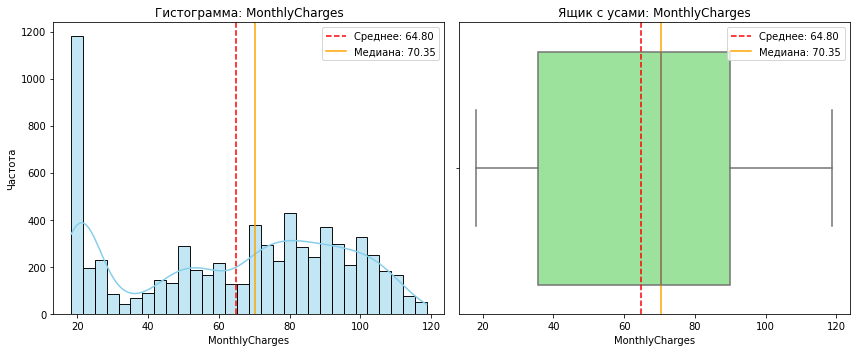

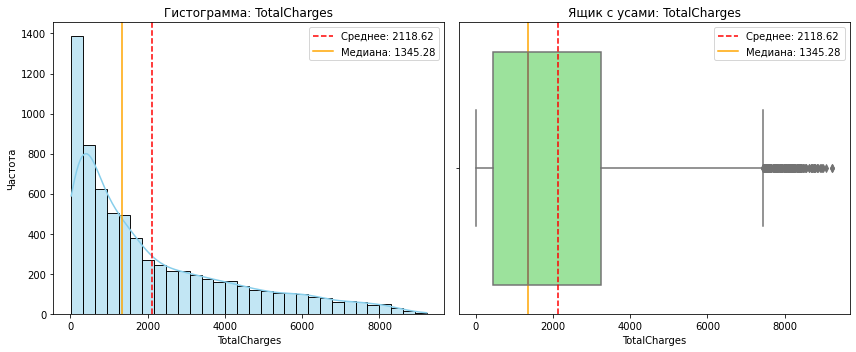

In [27]:
# Визуализация
plot_numerical_features(contract_df,  ['MonthlyCharges', 'TotalCharges'])

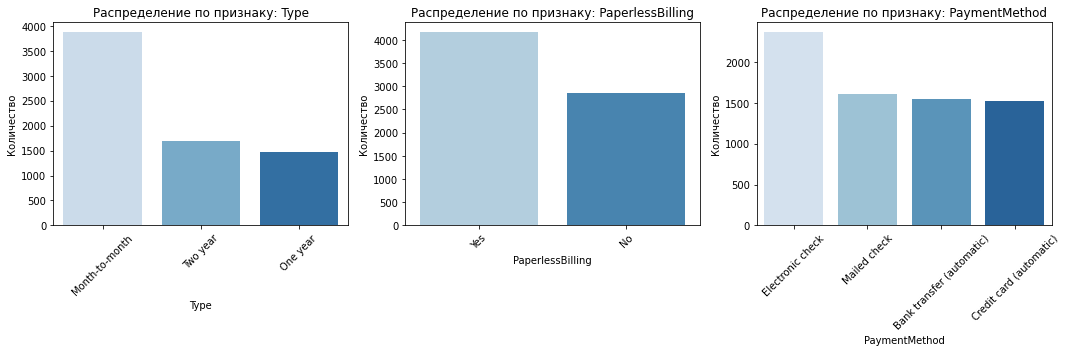

In [28]:
# Построение графиков для категориальных признаков
plot_categorical_features(contract_df, ['Type', 'PaperlessBilling', 'PaymentMethod'])

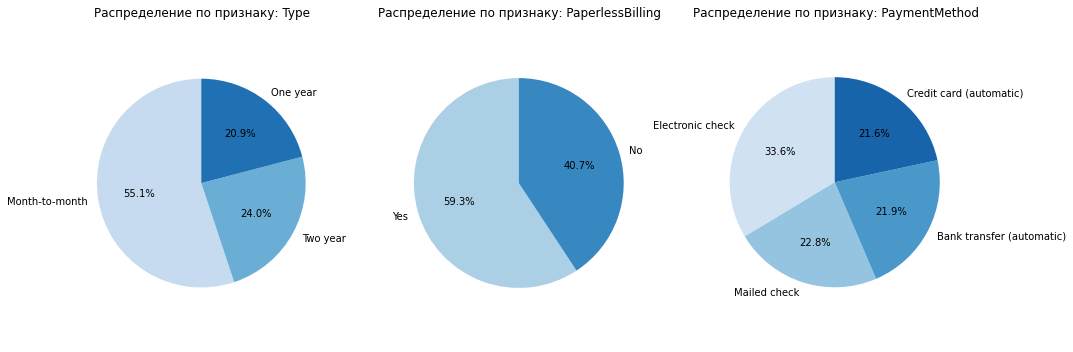

In [29]:
plot_categorical_features_pie(contract_df, ['Type', 'PaperlessBilling', 'PaymentMethod'])

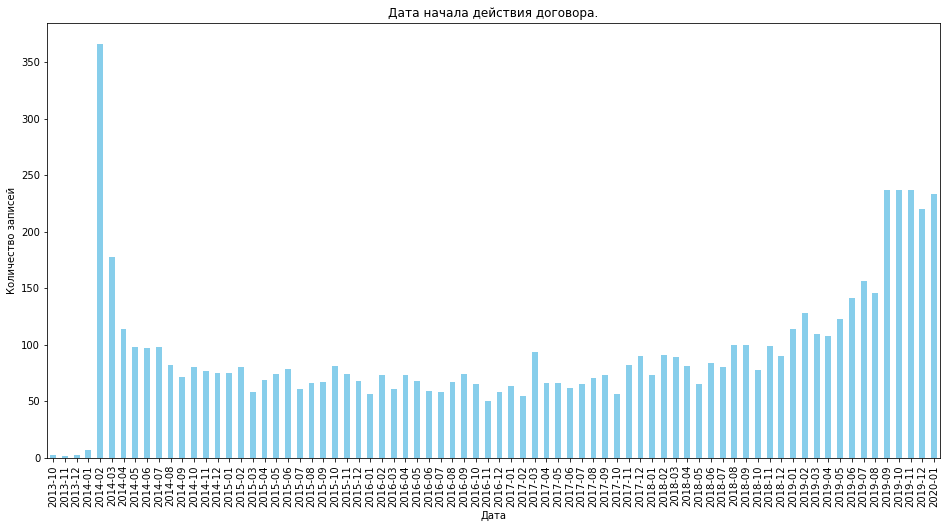

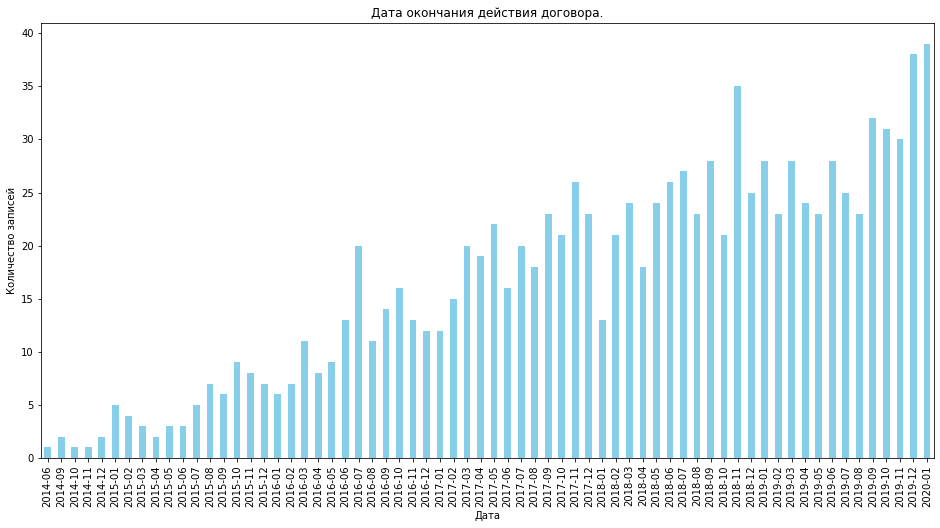

In [30]:
# Визуализация временных столбцов
plot_time_series(contract_df, 'BeginDate', 'Дата начала действия договора.')
plot_time_series(contract_df,  'EndDate', 'Дата окончания действия договора.')

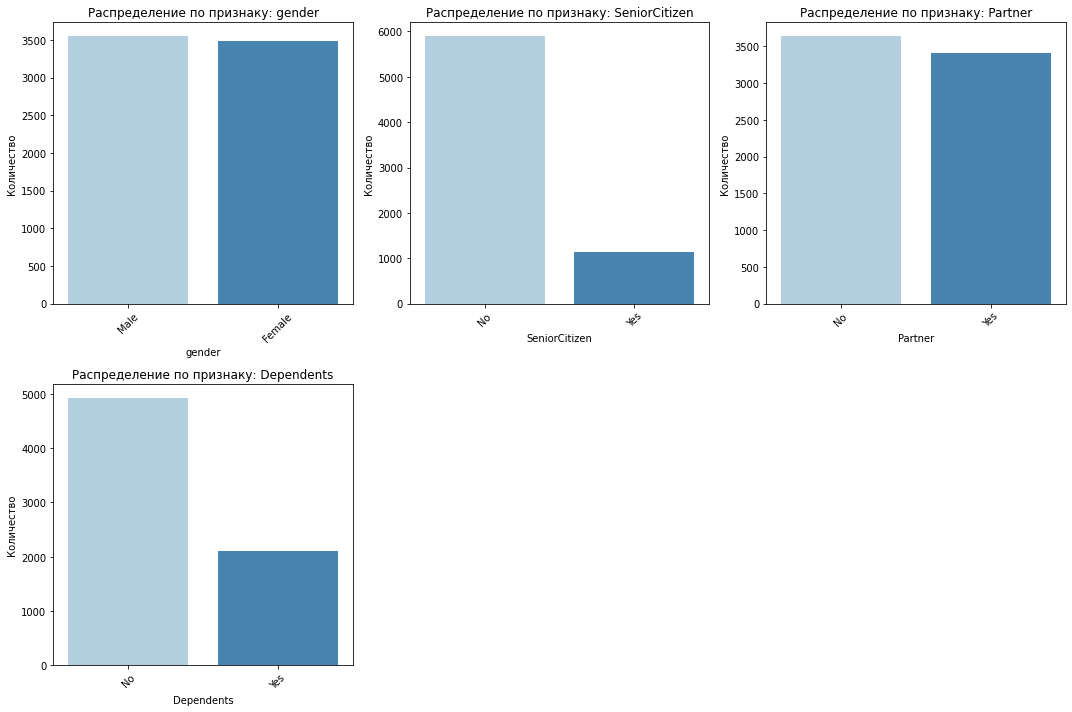

In [31]:
# Построение графиков для категориальных признаков
plot_categorical_features(personal_df, ['gender', 'SeniorCitizen', 'Partner', 'Dependents'])

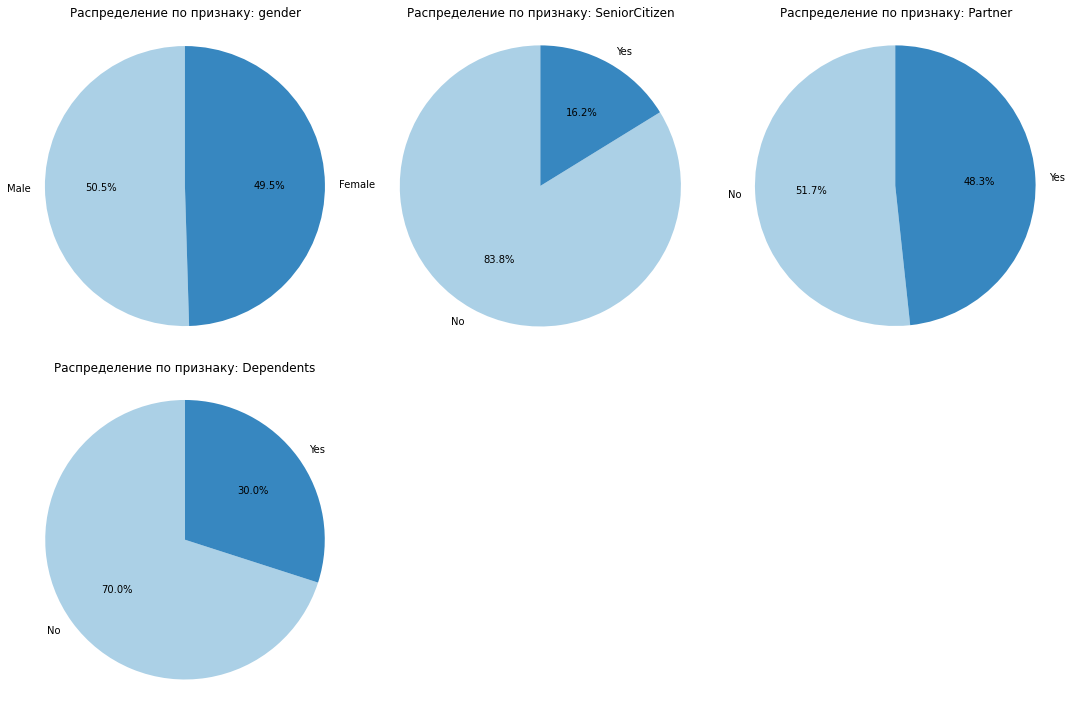

In [32]:
plot_categorical_features_pie(personal_df, ['gender', 'SeniorCitizen', 'Partner', 'Dependents'])

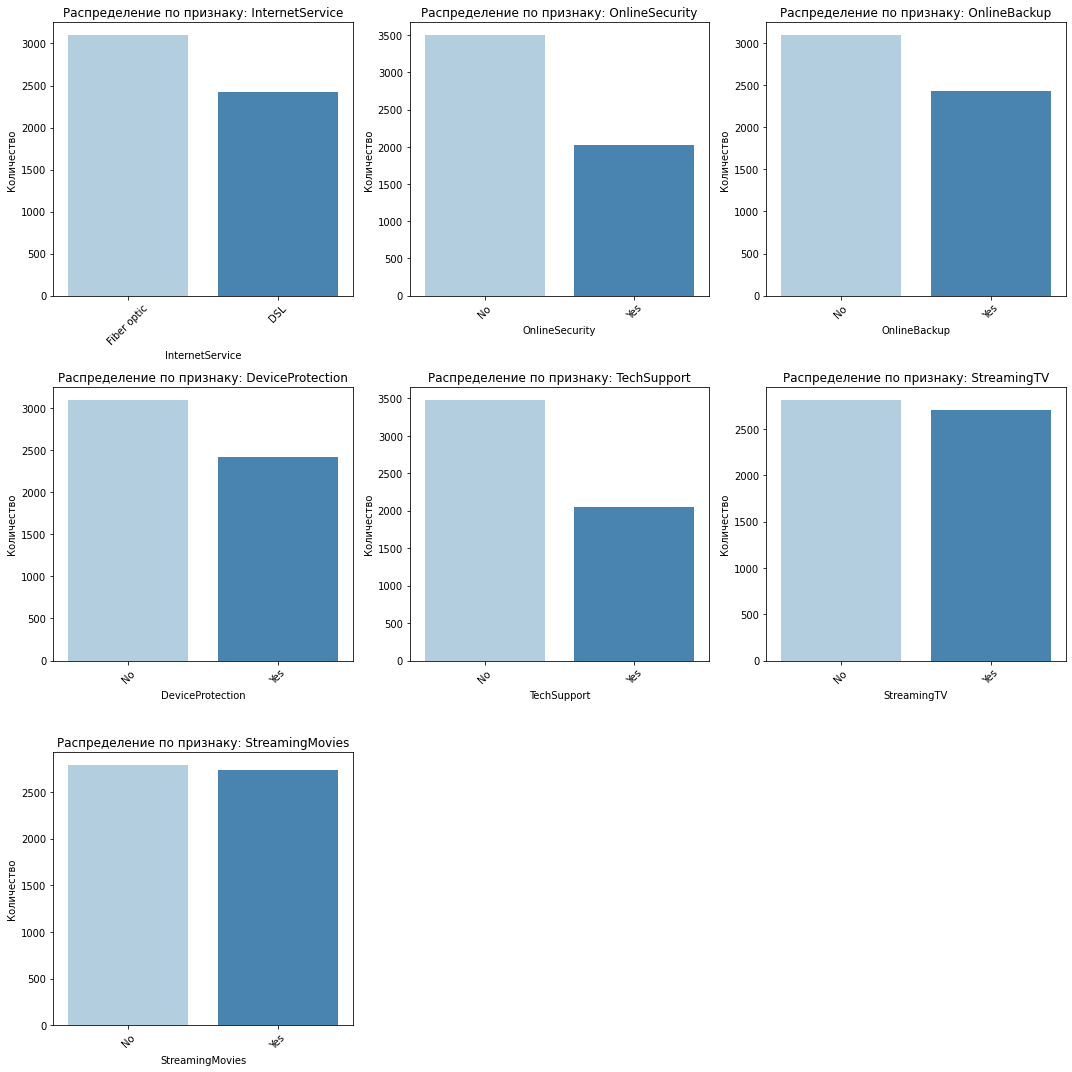

In [33]:
# Построение графиков для категориальных признаков
plot_categorical_features(internet_df, ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'])

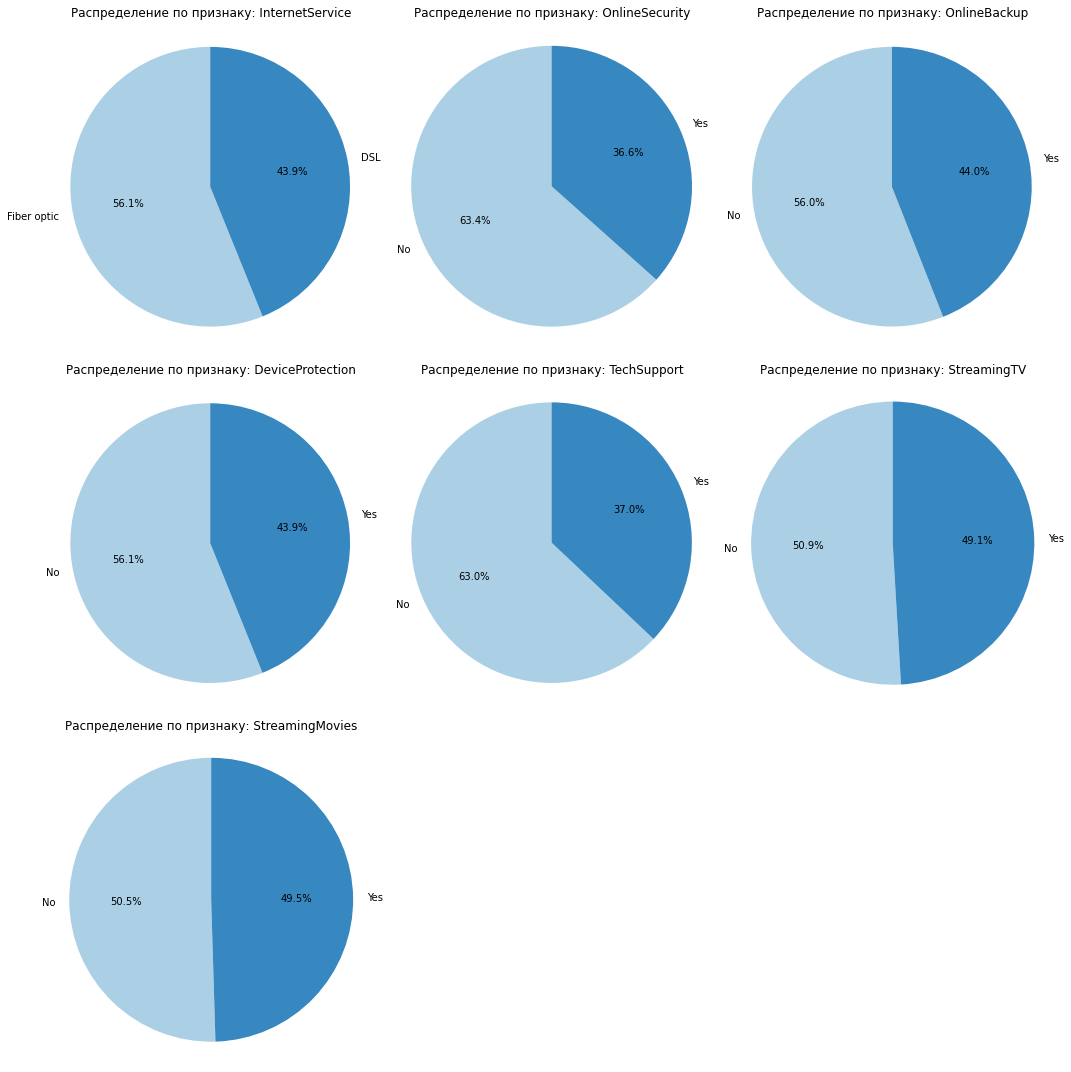

In [34]:
plot_categorical_features_pie(internet_df, ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'])

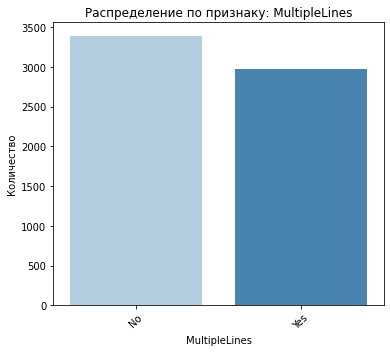

In [35]:
# Построение графиков для категориальных признаков
plot_categorical_features(phone_df, ['MultipleLines'])

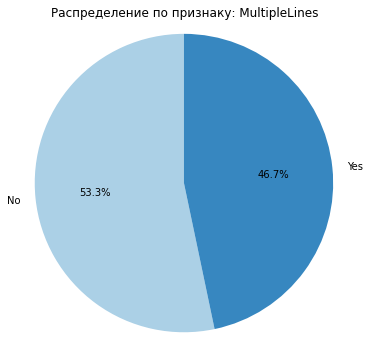

In [36]:
plot_categorical_features_pie(phone_df, ['MultipleLines'])

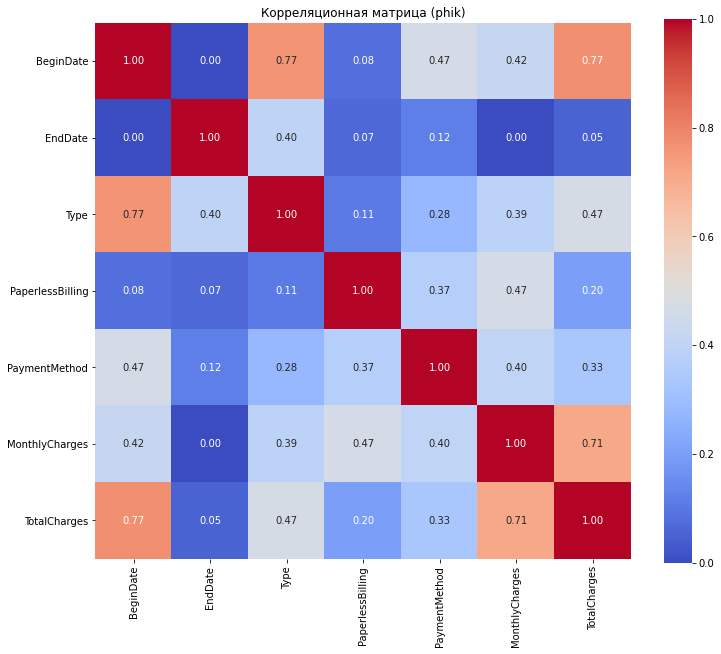

In [37]:
contract= contract_df.drop(columns=['customerID'])

# Вычисление корреляционной матрицы с использованием phik
phik_corr = contract.phik_matrix(interval_cols= ['MonthlyCharges', 'TotalCharges'])

# Визуализация корреляционной матрицы
plt.figure(figsize=(12, 10))
sns.heatmap(phik_corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Корреляционная матрица (phik)')
plt.show()

### Вывод

1. **Таблица `contract`**:
   - **MonthlyCharges**:
     - Непрерывная переменная с множеством пиков, вероятно, связанных с ежемесячными платежами.
     - Дополнительные затраты пользователей видны в разбросах рядом с основными значениями.
     - **Boxplot** показывает отсутствие выбросов, медиана ~70, большинство значений в диапазоне от 35 до 90 условных единиц.
   
   - **TotalCharges**:
     - Имеет показательное распределение, плавно убывающее вправо.
     - Медиана ~1345.
     - Распределение обусловлено накопительным характером затрат: чем дольше клиент пользуется услугами, тем выше общая сумма затрат.
     
     

2. **Таблицы `personal`, `internet`, `phone`**:
   - Все содержат только категориальные столбцы без неявных дубликатов.
   - В таблице `personal` рекомендуется изменить тип данных для столбца `SeniorCitizen` с `int` на `object` для корректной работы в дальнейших анализах.
3. **Сильная корреляция между `TotalCharges` и `MonthlyCharges`**:
   - Корреляция между `TotalCharges` и `MonthlyCharges` составляет 0.71, что указывает на сильную положительную взаимосвязь. Это означает, что клиенты, которые платят больше ежемесячно, как правило, имеют более высокие общие расходы. Это вполне ожидаемо, так как `TotalCharges` является суммой всех ежемесячных платежей.

2. **Корреляция между `BeginDate` и `EndDate`**:
   - Корреляция между `BeginDate` и `EndDate` равна 0, так как `EndDate` имеет много пропусков, поскольку большинство клиентов на момент анализа все еще имели активные контракты.

3. **Корреляция между `Type` и `TotalCharges`**:
   - Корреляция между типом договора (`Type`) и `TotalCharges` составляет 0.47. Это говорит о том, что разные типы оплаты могут быть связаны с различными уровнями общих расходов. 

4. **Корреляция между `PaperlessBilling` и `MonthlyCharges`**:
   - Корреляция между использованием электронного расчётного листа (`PaperlessBilling`) и `MonthlyCharges` составляет 0.47. Это может указывать на то, что клиенты, предпочитающие электронные счета, могут быть готовы платить больше за услуги.


## Шаг 3: Объединение данных

In [38]:
# Объединение contract_df и personal_df
data = contract_df.merge(personal_df, on='customerID', how='inner')

# Объединение с internet_df
data = data.merge(internet_df, on='customerID', how='outer')

# Объединение с phone_df
data = data.merge(phone_df, on='customerID', how='outer')
data = data.dropna(subset=['TotalCharges'])
analyze(data, "data")


Анализ DataFrame: data

Общая информация:


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,31.04,Female,No,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,2071.84,Male,No,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,NaT,Month-to-month,Yes,Mailed check,53.85,226.17,Male,No,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1960.60,Male,No,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,NaT,Month-to-month,Yes,Electronic check,70.70,353.50,Female,No,No,No,Fiber optic,No,No,No,No,No,No,No


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7032 non-null   object        
 1   BeginDate         7032 non-null   datetime64[ns]
 2   EndDate           1101 non-null   datetime64[ns]
 3   Type              7032 non-null   object        
 4   PaperlessBilling  7032 non-null   object        
 5   PaymentMethod     7032 non-null   object        
 6   MonthlyCharges    7032 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   gender            7032 non-null   object        
 9   SeniorCitizen     7032 non-null   object        
 10  Partner           7032 non-null   object        
 11  Dependents        7032 non-null   object        
 12  InternetService   5512 non-null   object        
 13  OnlineSecurity    5512 non-null   object        
 14  OnlineBackup      5512 n

None

Описательная статистика:


/tmp/ipykernel_247/2875323015.py:16: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  display(df.describe(include='all'))
/tmp/ipykernel_247/2875323015.py:16: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  display(df.describe(include='all'))


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
count,7032,7032,1101,7032,7032,7032,7032.000000,7032.000000,7032,7032,7032,7032,5512,5512,5512,5512,5512,5512,5512,6352
unique,7032,76,66,3,2,4,NaN,NaN,2,2,2,2,2,2,2,2,2,2,2,2
top,7694-VLBWQ,2014-02-01 00:00:00,2020-01-01 00:00:00,Month-to-month,Yes,Electronic check,NaN,NaN,Male,No,No,No,Fiber optic,No,No,No,No,No,No,No
freq,1,366,39,3875,4168,2365,NaN,NaN,3549,5890,3639,4933,3096,3497,3087,3094,3472,2809,2781,3385
first,NaN,2013-10-01 00:00:00,2014-06-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2020-01-01 00:00:00,2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,64.798208,2118.621822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,30.085974,2112.736199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,19.050000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,35.587500,439.745000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


------------------------------
Анализ столбца: customerID
Тип данных: object, Количество уникальных значений: 7032
Количество пропущенных значений (NaN, None): 0, Процент: 0.0%
Количество пустых строк и пробелов: 0, Процент: 0.0%
------------------------------ 

------------------------------
Анализ столбца: BeginDate
Тип данных: datetime64[ns], Количество уникальных значений: 76
Количество пропущенных значений (NaN, None): 0, Процент: 0.0%
------------------------------ 

------------------------------
Анализ столбца: EndDate
Тип данных: datetime64[ns], Количество уникальных значений: 66
Количество пропущенных значений (NaN, None): 5931, Процент: 84.34%
------------------------------ 

------------------------------
Анализ столбца: Type
Тип данных: object, Количество уникальных значений: 3
Уникальные значения: ['Month-to-month' 'One year' 'Two year']
Количество пропущенных значений (NaN, None): 0, Процент: 0.0%
Количество пустых строк и пробелов: 0, Процент: 0.0%
---------------------

### Общая информация:
1. **Количество записей**: В результате объединения данных у нас осталось 7032 записи.
2. **Количество столбцов**: Датафрейм содержит 20 столбцов.

**Пропуски в данных:**
1. **Столбец `EndDate`**: Имеет 5931 пропуск (84.34%), что указывает на то, что большинство клиентов не завершили свои контракты к моменту сбора данных. 
2. **Столбцы, связанные с интернет-услугами**: Столбцы `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies` имеют по 1520 пропусков (около 21.62%).
3. **Столбец `MultipleLines`**: Имеет 680 пропусков (9.67%).

In [39]:
# Заполнение пропусков в столбцах интернет-услуг
internet_columns = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
data[internet_columns] = data[internet_columns].fillna('No')

# Заполнение пропусков в столбце MultipleLines
data['MultipleLines'].fillna('No', inplace=True)

# Проверка на наличие пропусков после обработки
print(data.isnull().sum())

customerID             0
BeginDate              0
EndDate             5931
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
MultipleLines          0
dtype: int64


### Создание новых признаков

Из столбца `BeginDate` можно извлекем временные характеристики, такие как:

- Год начала договора
- Месяц начала договора
- День начала договора
- Длительность контракта (в днях) до текущей даты (или до даты анализа)

Из столбца `EndDate` создадим новый целевой признак `Churn`, который будет указывать, разорвал ли клиент контракт или нет. Поскольку у вас много пропусков в `EndDate`, то используем следующую логику:

- Если `EndDate` не является пропуском (то есть контракт завершен), присвоить целевому признаку значение 1 (разорвал контракт).
- Если `EndDate` является пропуском (то есть контракт активен), присвоить значение 0 (не разорвал контракт).

In [40]:
# Установка даты выгрузки
current_date = pd.to_datetime('2020-02-01')

# Создание целевого признака из EndDate
data['Churn'] = data['EndDate'].apply(lambda x: 1 if pd.notnull(x) else 0)

# Создание нового признака для длительности контракта
data['ContractDuration'] = data.apply(
    lambda row: (row['EndDate'] - row['BeginDate']).days if pd.notnull(row['EndDate']) 
    else (current_date - row['BeginDate']).days, axis=1
)

# Удаление старых столбцов BeginDate и EndDate
data.drop(columns=['BeginDate', 'EndDate'], inplace=True)

# Проверка результата
print(data[['Churn', 'ContractDuration']].head())


   Churn  ContractDuration
0      0                31
1      0              1036
2      0               123
3      0              1371
4      0               153


In [41]:
analyze(data, "data")


Анализ DataFrame: data

Общая информация:


,customerID,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Churn,ContractDuration
0,7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,31.04,Female,No,Yes,No,DSL,No,Yes,No,No,No,No,No,0,31
1,5575-GNVDE,One year,No,Mailed check,56.95,2071.84,Male,No,No,No,DSL,Yes,No,Yes,No,No,No,No,0,1036
2,3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,226.17,Male,No,No,No,DSL,Yes,Yes,No,No,No,No,No,0,123
3,7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1960.60,Male,No,No,No,DSL,Yes,No,Yes,Yes,No,No,No,0,1371
4,9237-HQITU,Month-to-month,Yes,Electronic check,70.70,353.50,Female,No,No,No,Fiber optic,No,No,No,No,No,No,No,0,153


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Type              7032 non-null   object 
 2   PaperlessBilling  7032 non-null   object 
 3   PaymentMethod     7032 non-null   object 
 4   MonthlyCharges    7032 non-null   float64
 5   TotalCharges      7032 non-null   float64
 6   gender            7032 non-null   object 
 7   SeniorCitizen     7032 non-null   object 
 8   Partner           7032 non-null   object 
 9   Dependents        7032 non-null   object 
 10  InternetService   7032 non-null   object 
 11  OnlineSecurity    7032 non-null   object 
 12  OnlineBackup      7032 non-null   object 
 13  DeviceProtection  7032 non-null   object 
 14  TechSupport       7032 non-null   object 
 15  StreamingTV       7032 non-null   object 
 16  StreamingMovies   7032 non-null   object 


None

Описательная статистика:


,customerID,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Churn,ContractDuration
count,7032,7032,7032,7032,7032.000000,7032.000000,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032.000000,7032.000000
unique,7032,3,2,4,NaN,NaN,2,2,2,2,3,2,2,2,2,2,2,2,NaN,NaN
top,7694-VLBWQ,Month-to-month,Yes,Electronic check,NaN,NaN,Male,No,No,No,Fiber optic,No,No,No,No,No,No,No,NaN,NaN
freq,1,3875,4168,2365,NaN,NaN,3549,5890,3639,4933,3096,5017,4607,4614,4992,4329,4301,4065,NaN,NaN
mean,NaN,NaN,NaN,NaN,64.798208,2118.621822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156570,899.961320
std,NaN,NaN,NaN,NaN,30.085974,2112.736199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.363421,682.738777
min,NaN,NaN,NaN,NaN,18.250000,19.050000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,28.000000
25%,NaN,NaN,NaN,NaN,35.587500,439.745000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,276.000000
50%,NaN,NaN,NaN,NaN,70.350000,1345.275000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,761.000000
75%,NaN,NaN,NaN,NaN,89.862500,3239.317500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1461.000000


------------------------------
Анализ столбца: customerID
Тип данных: object, Количество уникальных значений: 7032
Количество пропущенных значений (NaN, None): 0, Процент: 0.0%
Количество пустых строк и пробелов: 0, Процент: 0.0%
------------------------------ 

------------------------------
Анализ столбца: Type
Тип данных: object, Количество уникальных значений: 3
Уникальные значения: ['Month-to-month' 'One year' 'Two year']
Количество пропущенных значений (NaN, None): 0, Процент: 0.0%
Количество пустых строк и пробелов: 0, Процент: 0.0%
------------------------------ 

------------------------------
Анализ столбца: PaperlessBilling
Тип данных: object, Количество уникальных значений: 2
Уникальные значения: ['No' 'Yes']
Количество пропущенных значений (NaN, None): 0, Процент: 0.0%
Количество пустых строк и пробелов: 0, Процент: 0.0%
------------------------------ 

------------------------------
Анализ столбца: PaymentMethod
Тип данных: object, Количество уникальных значений: 4
Уникал

In [42]:
print(data.isnull().sum())

customerID          0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
MultipleLines       0
Churn               0
ContractDuration    0
dtype: int64


In [43]:
report_removed_data(data)

Исходное количество записей: 7043
Количество записей после удаления: 7032
Количество удаленных записей: 11
Доля удаленных данных: 0.16%


## Шаг 4: Анализ объединённого датафрейма



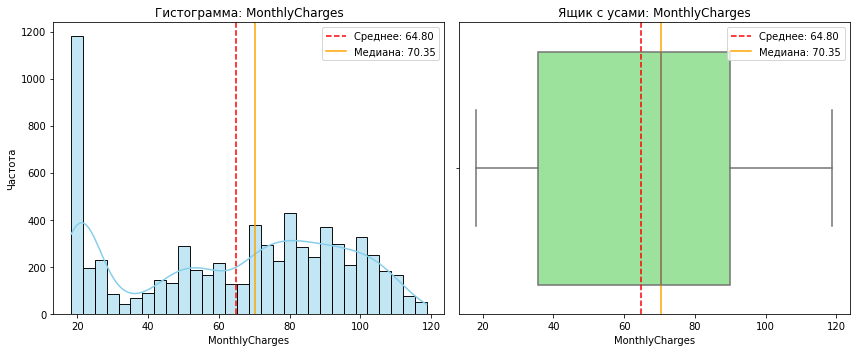

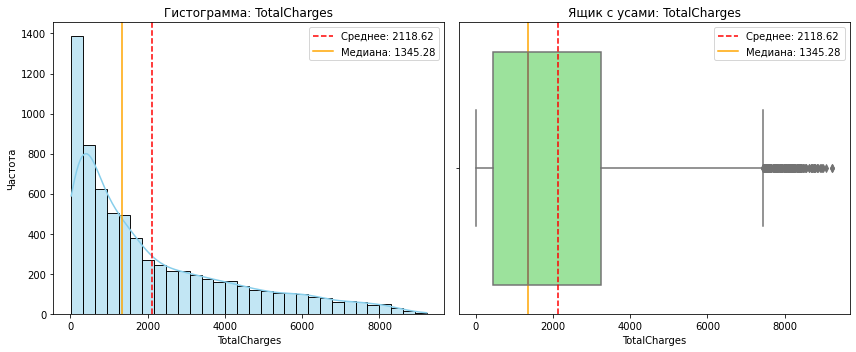

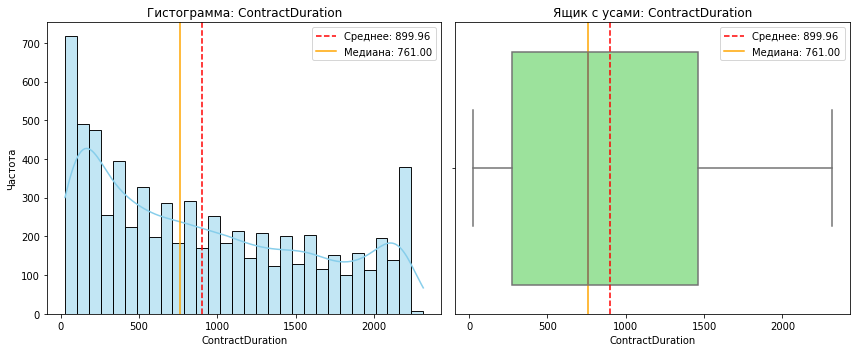

In [44]:
# Визуализация числовых признаков
plot_numerical_features(data, ['MonthlyCharges', 'TotalCharges', 'ContractDuration'])

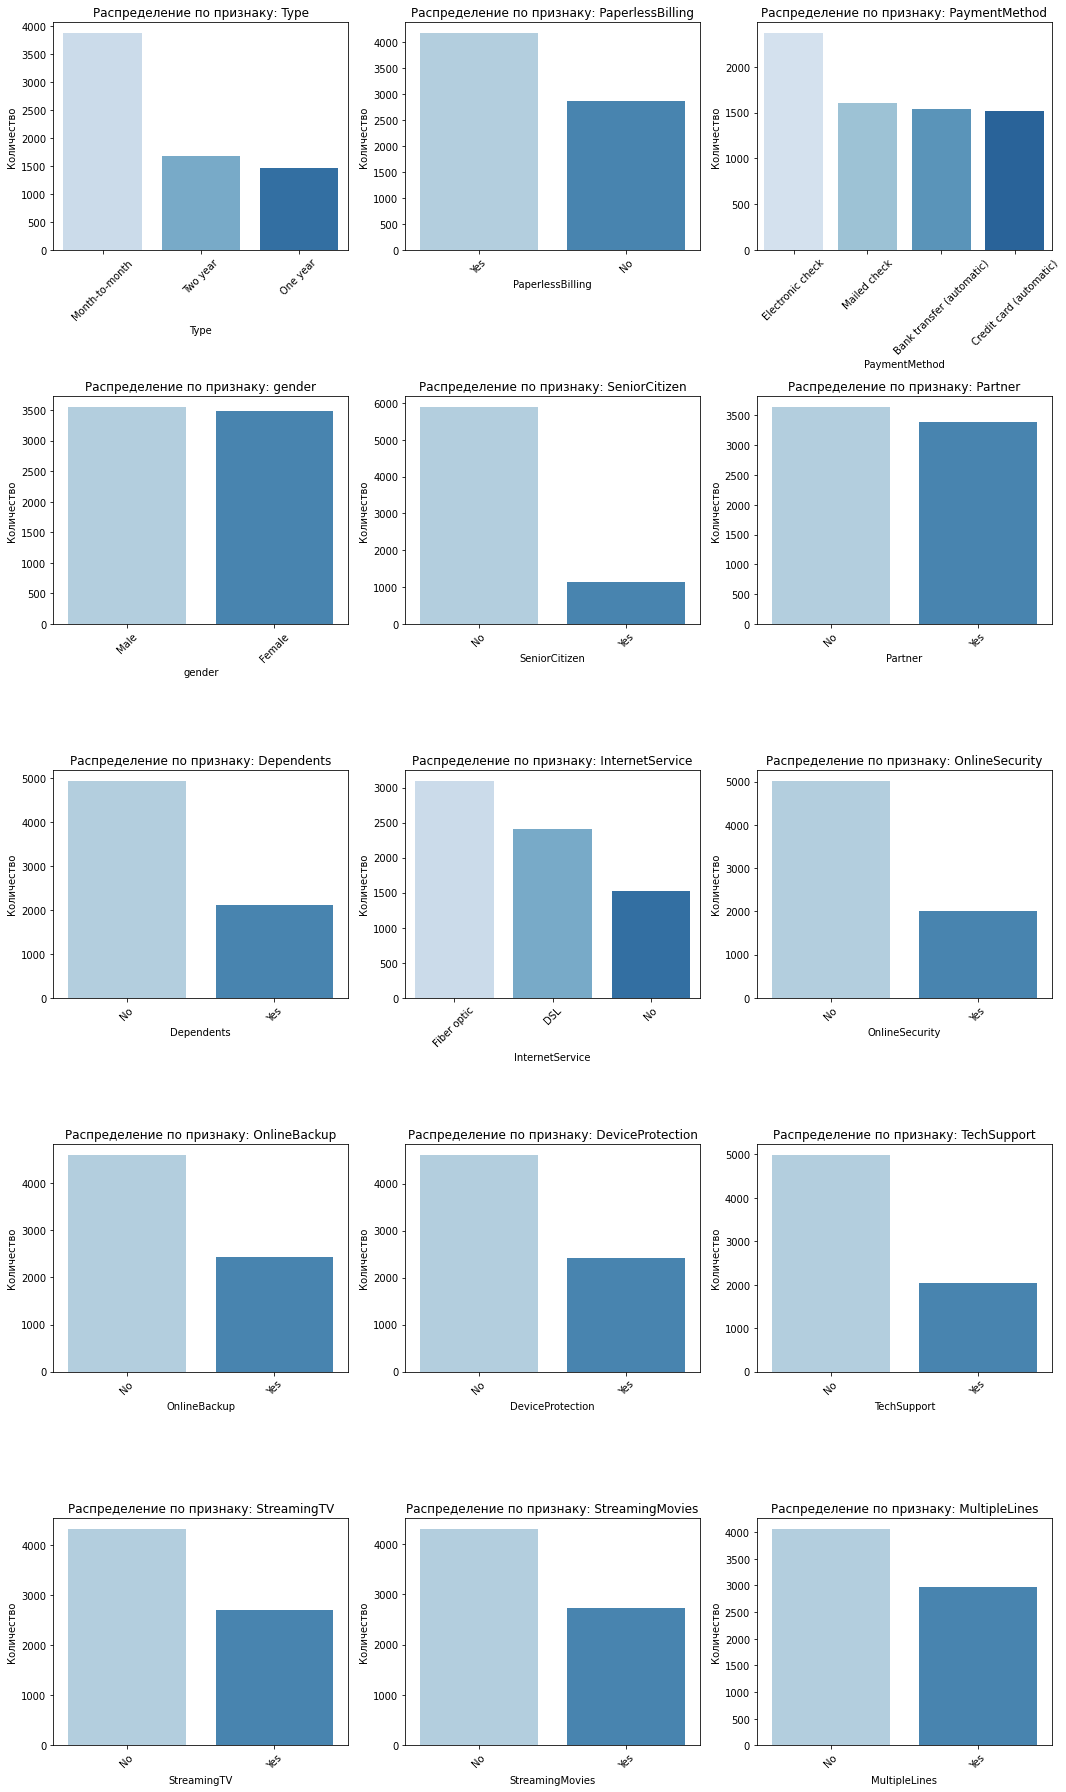

In [45]:
# Визуализация категориальных признаков
categorical_features = [
    'Type', 'PaperlessBilling', 'PaymentMethod',
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'MultipleLines'
]

plot_categorical_features(data, categorical_features)

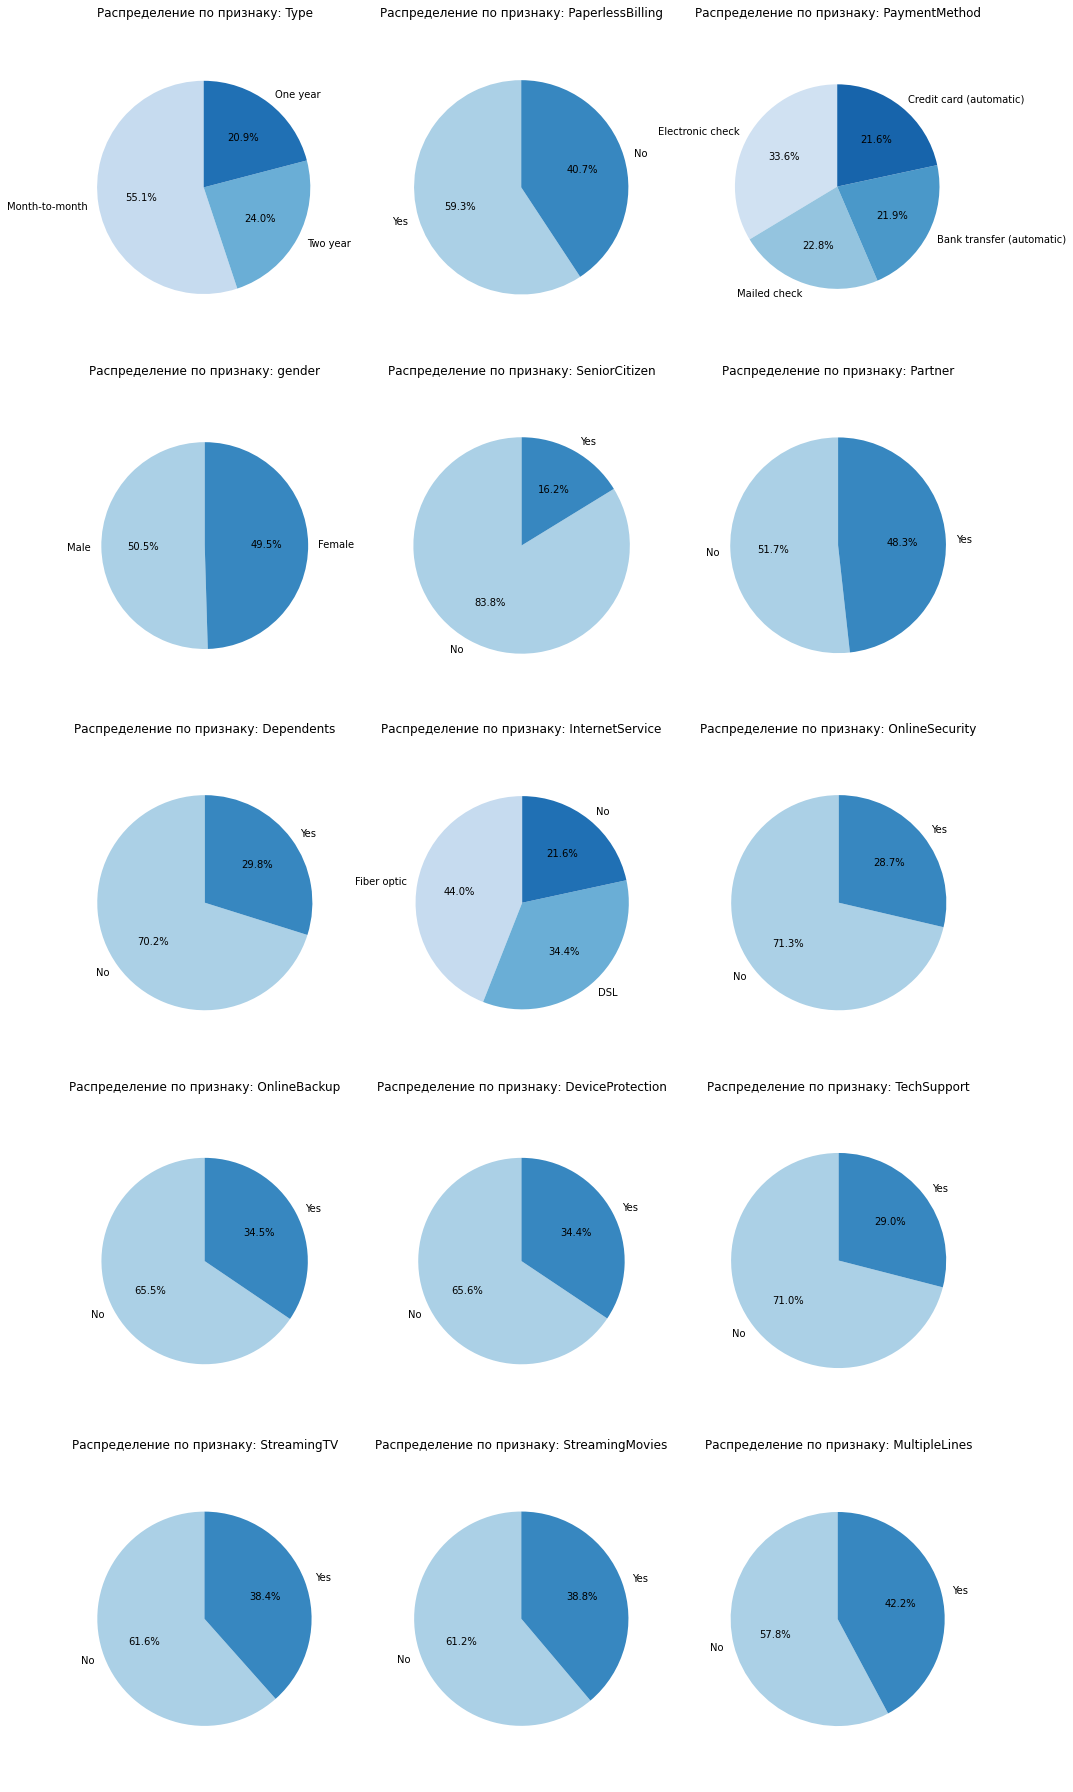

In [46]:
plot_categorical_features_pie(data, categorical_features)

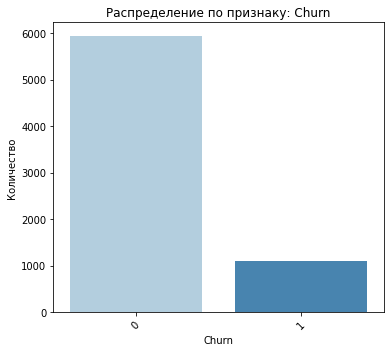

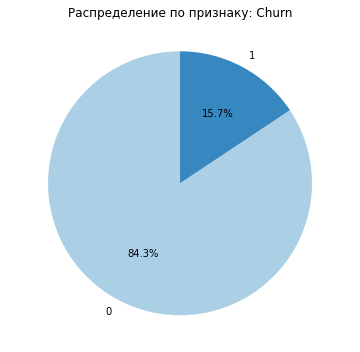

In [47]:
plot_categorical_features(data,['Churn'])
plot_categorical_features_pie(data,['Churn'])

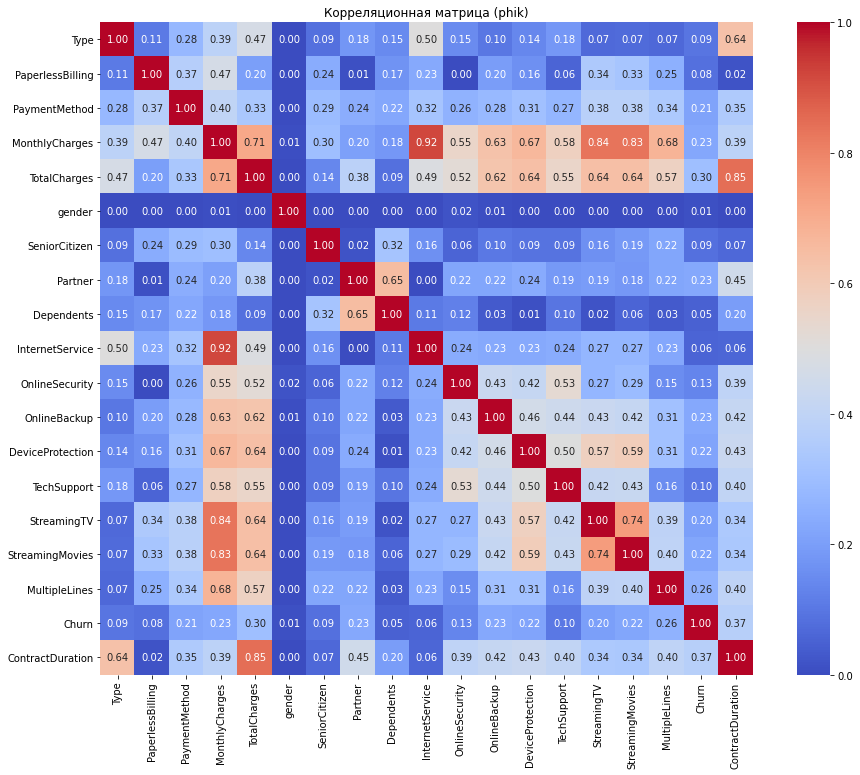

In [48]:
data_copy = data.drop(columns=['customerID'])
# Вычисление корреляционной матрицы с использованием phik
phik_corr = data_copy.phik_matrix(interval_cols=['MonthlyCharges', 'TotalCharges', 'ContractDuration'])

# Визуализация корреляционной матрицы
plt.figure(figsize=(16, 12))
sns.heatmap(phik_corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Корреляционная матрица (phik)')
plt.show()

### Анализ корреляционной матрицы и переменных

- **Факторы, влияющие на отток**: Основные факторы, на которые стоит обратить внимание, включают ContractDuration и MonthlyCharges. 


**Анализ переменных: MonthlyCharges, ContractDuration и Churn**

**MonthlyCharges (Ежемесячная плата)**

- **TotalCharges (0.711)**: Подтверждает связь между высокими ежемесячными платежами и общими расходами.
- **InternetService (0.919)**: Высокая корреляция с услугами интернета указывает на выбор более дорогих тарифов.
- **StreamingTV (0.836) и StreamingMovies (0.833)**: Высокая корреляция с услугами потокового телевидения и фильмов.
- **Дополнительные услуги**: Умеренные корреляции с MultipleLines, DeviceProtection, TechSupport и OnlineBackup указывают на связь с более дорогими планами.
- **PaperlessBilling (0.468) и PaymentMethod (0.399)**: Умеренные корреляции могут указывать на предпочтение безналичных платежей.

**ContractDuration (Продолжительность контракта)**

- **TotalCharges (0.798)**: Сильная положительная корреляция подтверждает, что клиенты с длительными контрактами в итоге тратят больше денег. Это может быть связано с обязательствами, которые клиенты берут на себя при подписании долгосрочных соглашений.
  
- **BeginYear (0.919)**: Очень высокая корреляция указывает на то, что долгосрочные контракты популярны в определенные годы.

- **MonthlyCharges (0.426)**: Умеренная положительная корреляция.

- **Partner (0.496) и Dependents (0.206)**: Умеренные положительные корреляции могут указывать на то, что семьи чаще выбирают долгосрочные контракты. Это может быть связано с необходимостью стабильности и предсказуемости расходов.

**Churn (Отток)**

- **ContractDuration (-0.470)**: Длительные контракты снижают вероятность оттока, что делает их важным фактором для удержания клиентов. 

- **MonthlyCharges (0.225)**: Низкая положительная корреляция указывает на слабую связь между высокой ежемесячной платой и увеличением оттока.

- **PaperlessBilling (0.083) и PaymentMethod (0.214)**: Слабые корреляции могут указывать на незначительное влияние методов оплаты и безбумажной отчетности на уровень оттока клиентов. 


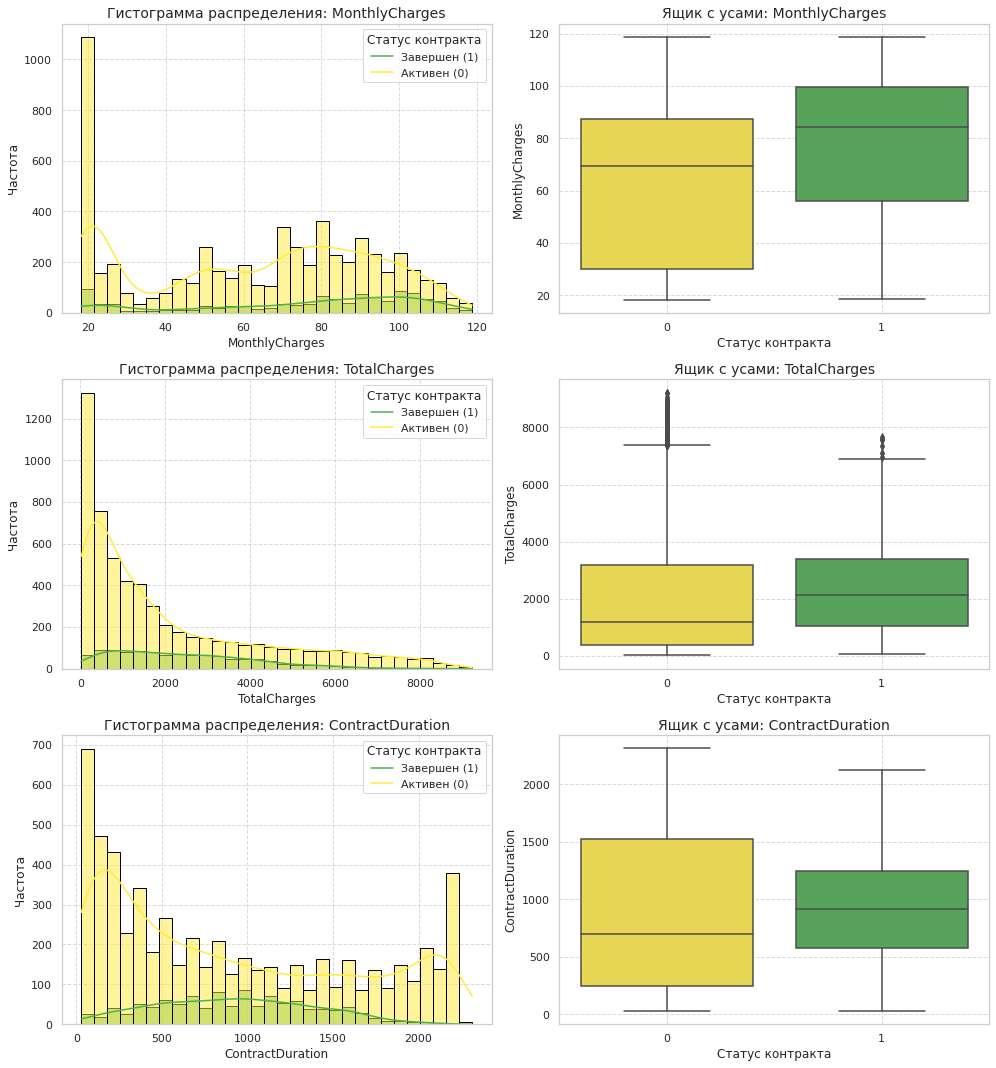

In [49]:
plot_distribution_curn(data, ['MonthlyCharges', 'TotalCharges', 'ContractDuration'])

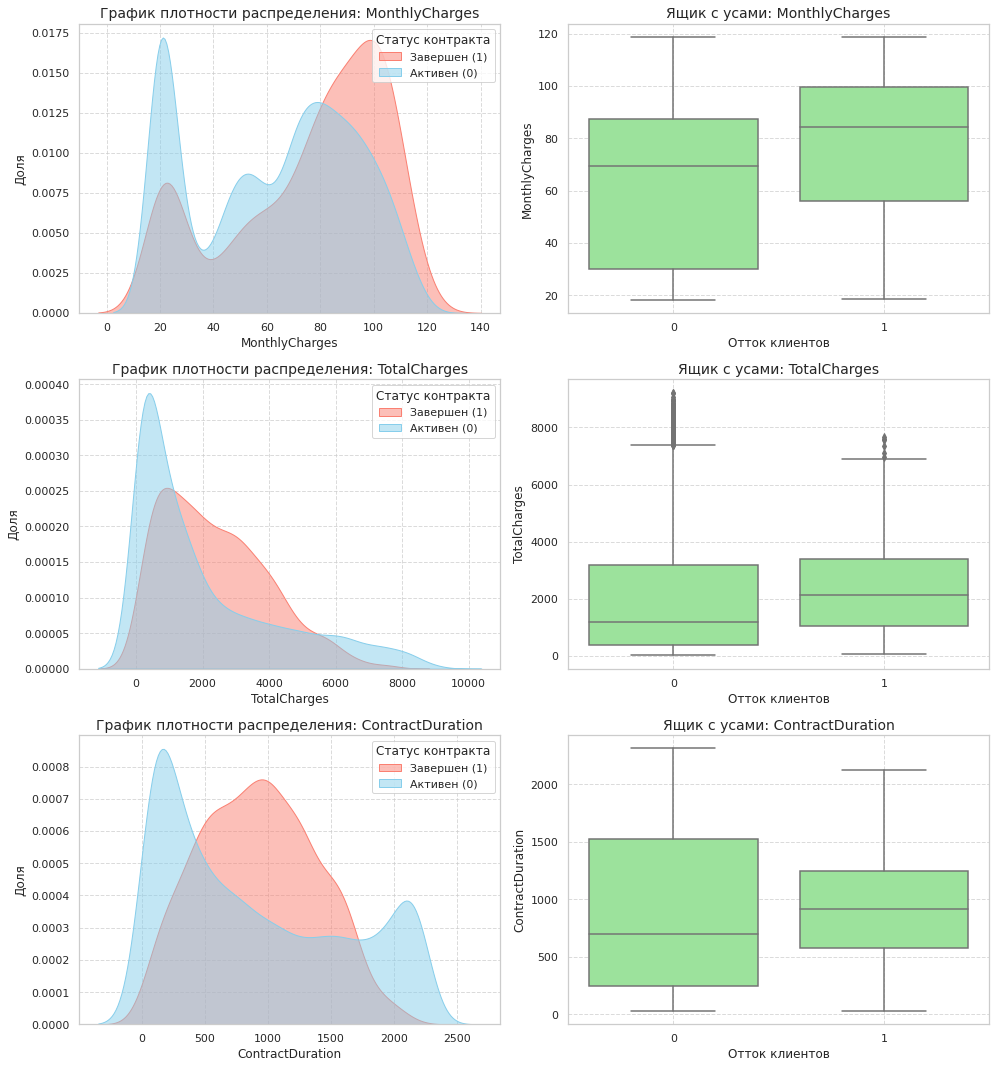

In [50]:
plot_distribution_kde(data, ['MonthlyCharges', 'TotalCharges', 'ContractDuration'])

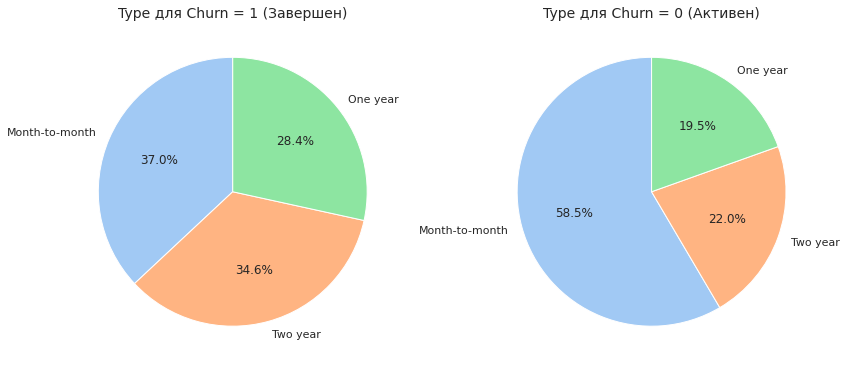

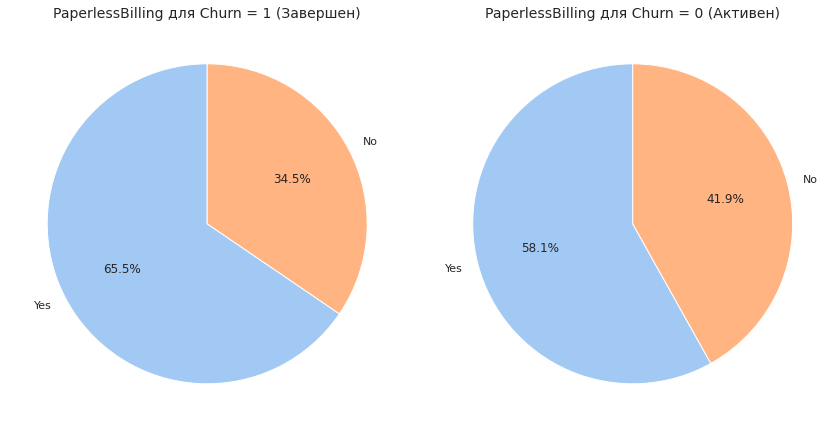

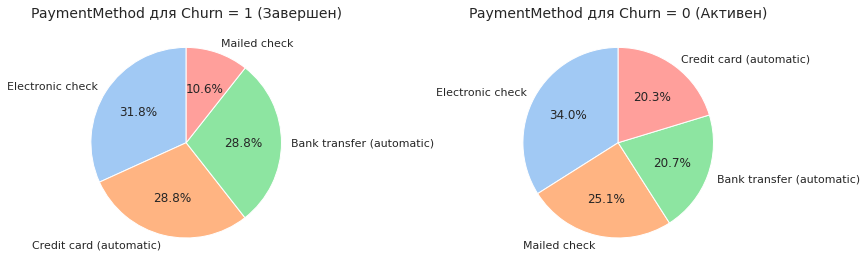

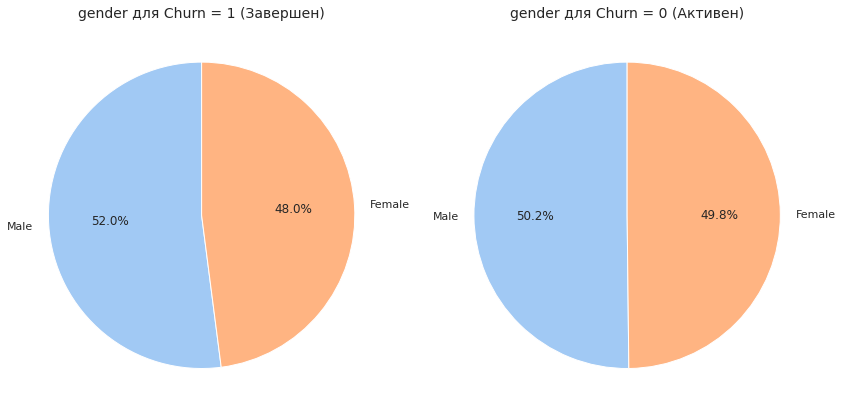

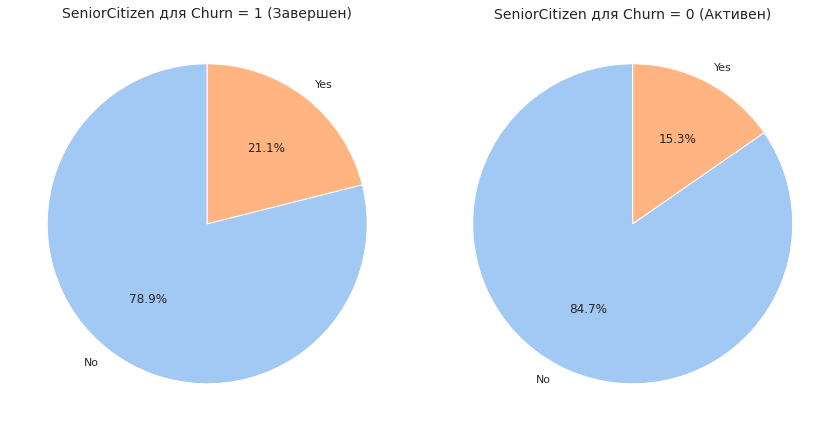

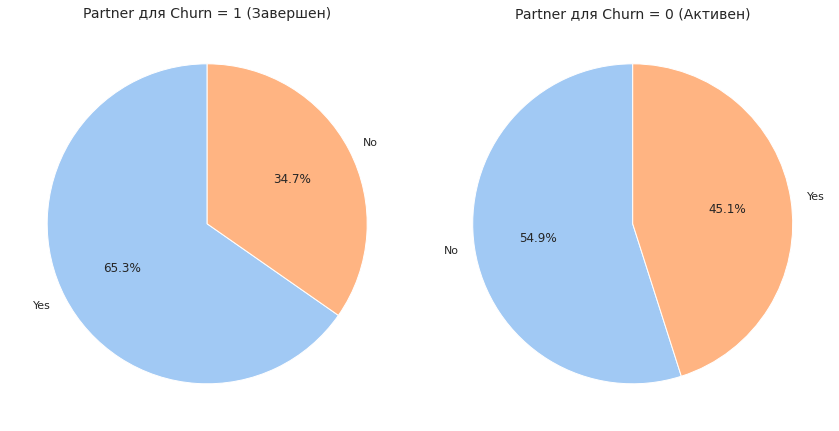

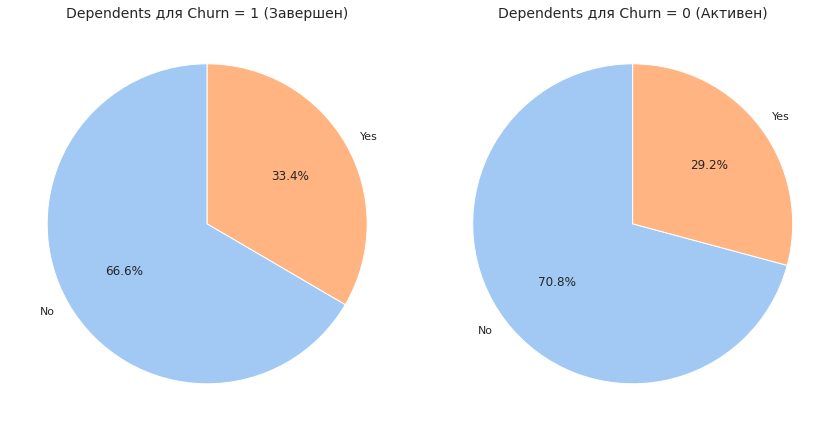

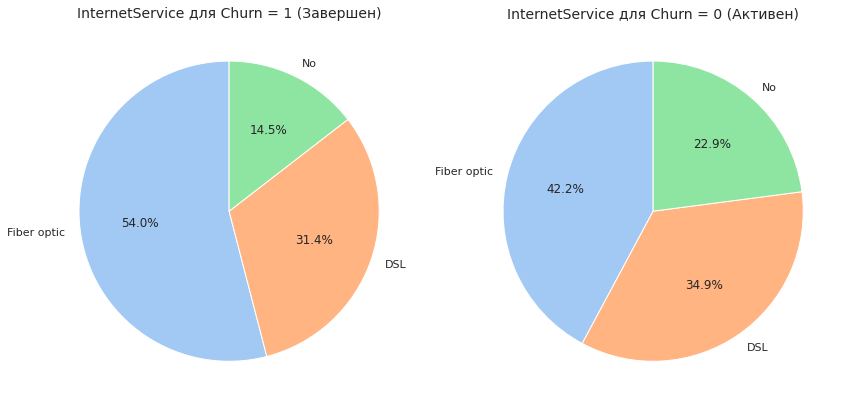

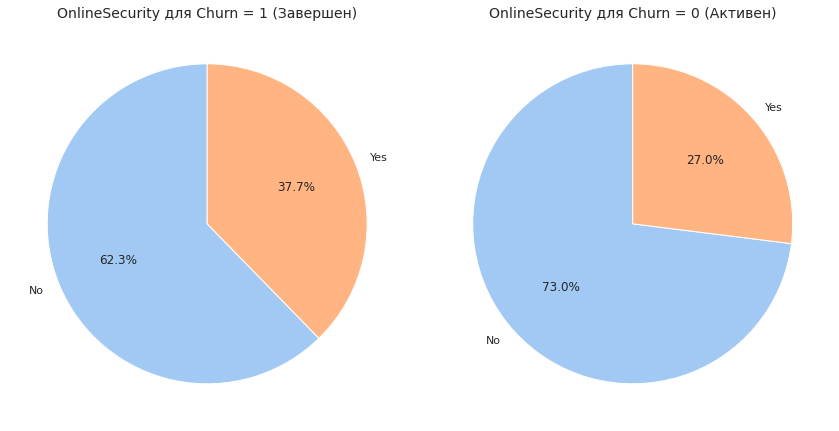

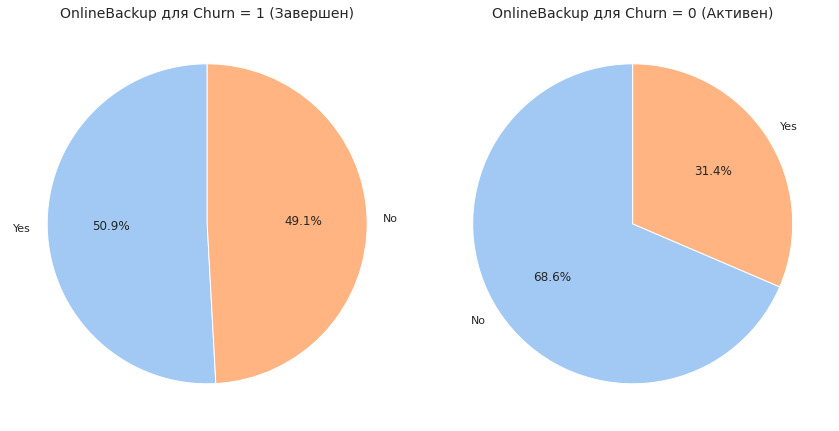

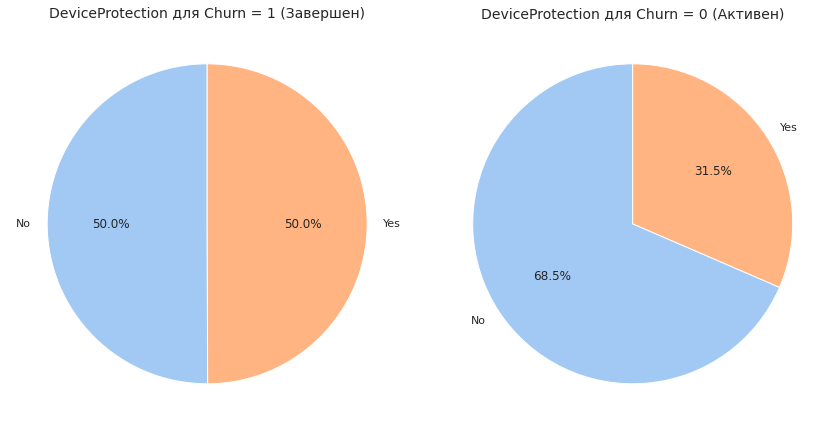

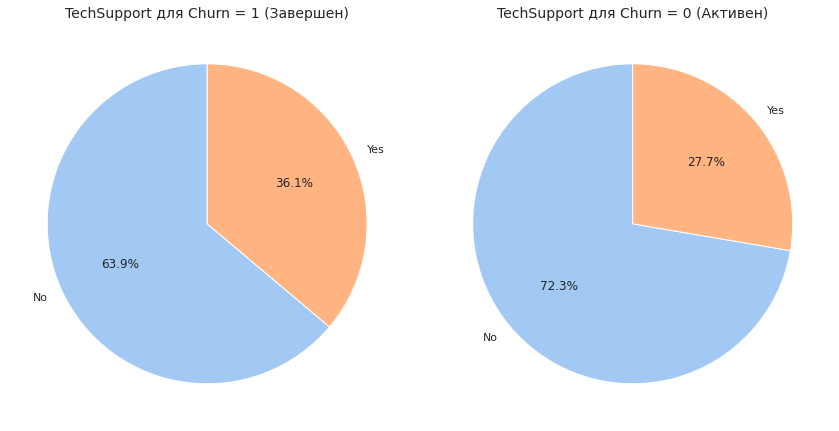

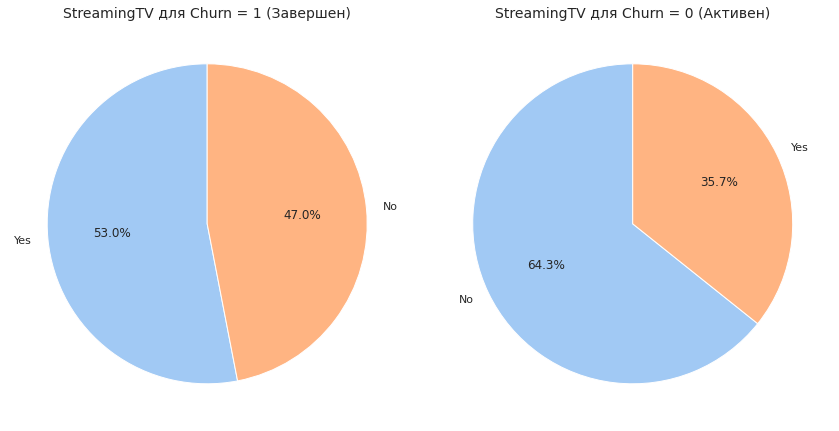

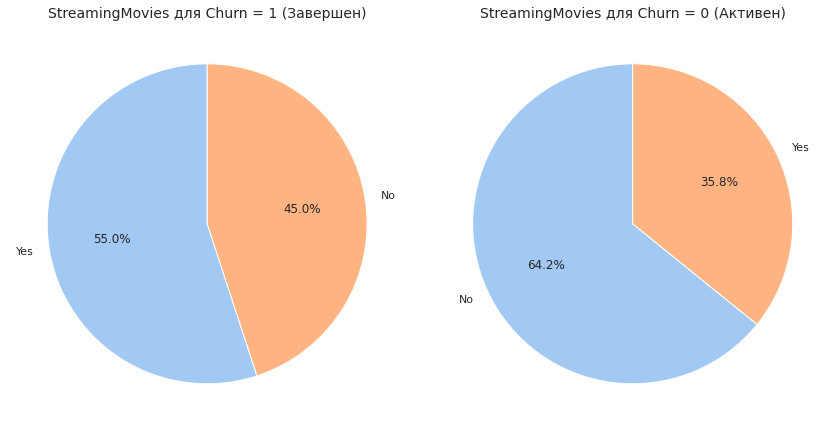

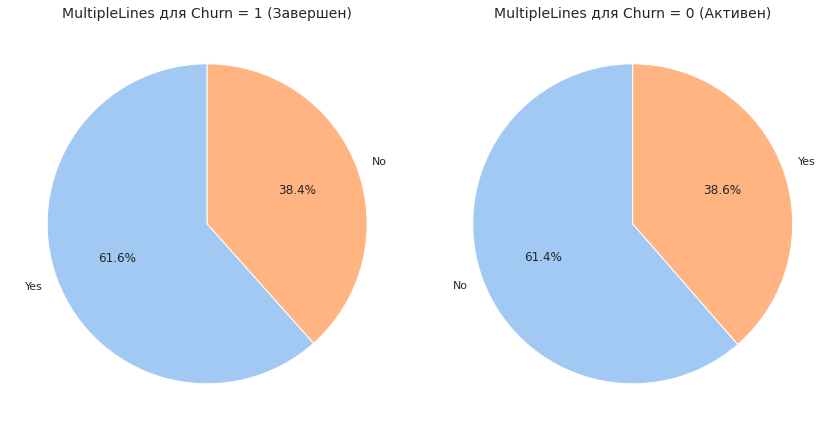

In [51]:
plot_categorical_features_pie_churn(data_copy)

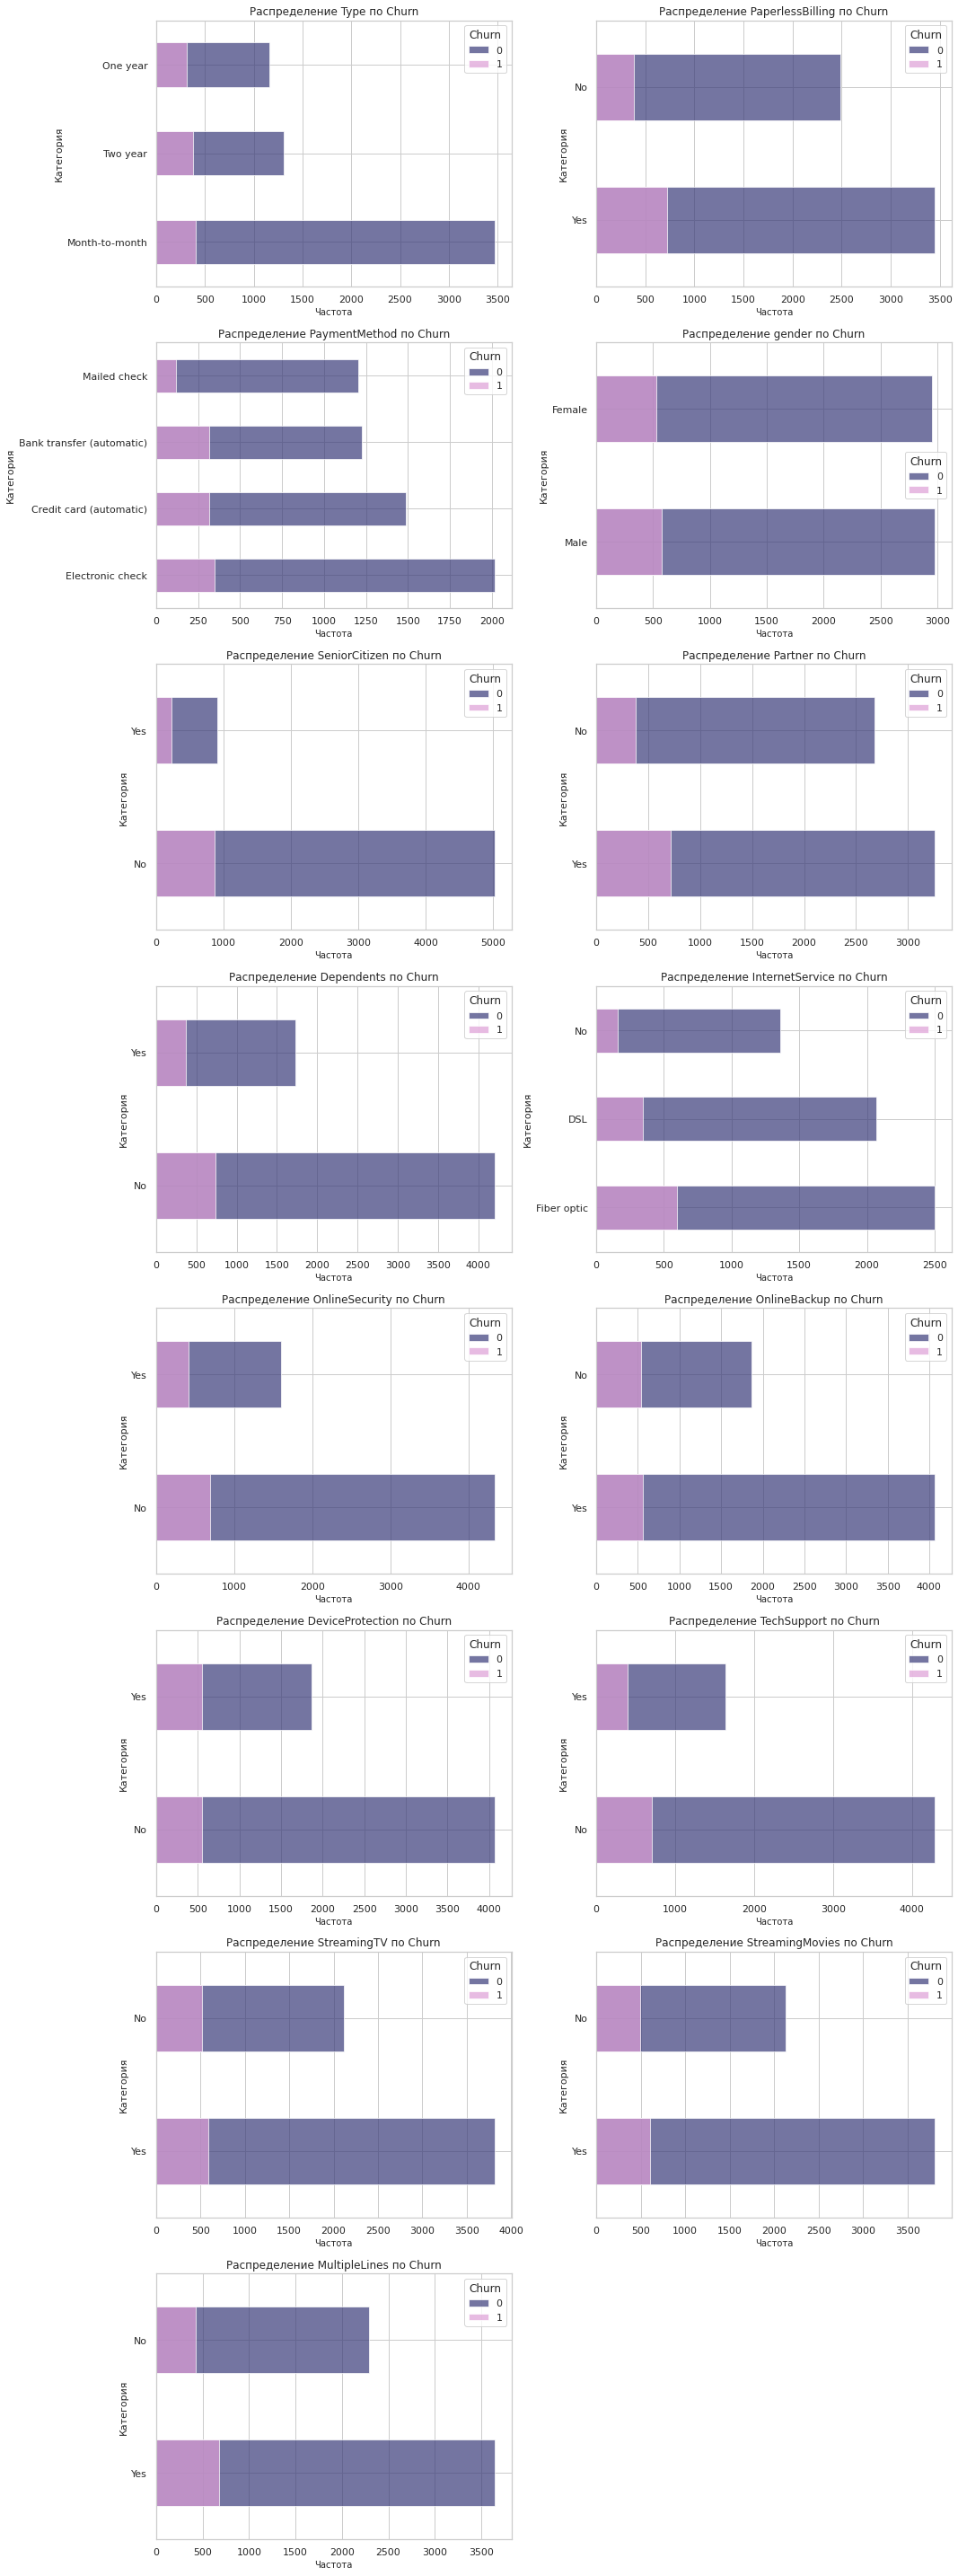

In [52]:
plot_categorical_features_churn(data_copy)

In [53]:
analyze_churn(data, target_column='Churn')

Портрет 'активного клиента':
Количество активных клиентов: 5931

Статистика активных клиентов:


,customerID,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Churn,ContractDuration
count,5931,5931,5931,5931,5931.000000,5931.000000,5931,5931,5931,5931,5931,5931,5931,5931,5931,5931,5931,5931,5931.0,5931.000000
unique,5931,3,2,4,NaN,NaN,2,2,2,2,3,2,2,2,2,2,2,2,NaN,NaN
top,9300-RENDD,Month-to-month,Yes,Electronic check,NaN,NaN,Male,No,No,No,Fiber optic,No,No,No,No,No,No,No,NaN,NaN
freq,1,3468,3447,2015,NaN,NaN,2976,5021,3257,4200,2501,4331,4066,4063,4289,3812,3806,3642,NaN,NaN
mean,NaN,NaN,NaN,NaN,62.803043,2071.701614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,895.338560
std,NaN,NaN,NaN,NaN,29.841911,2194.122190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,716.588322
min,NaN,NaN,NaN,NaN,18.250000,19.050000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,31.000000
25%,NaN,NaN,NaN,NaN,30.125000,376.225000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,245.000000
50%,NaN,NaN,NaN,NaN,69.250000,1194.280000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,702.000000
75%,NaN,NaN,NaN,NaN,87.325000,3176.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1523.000000



Портрет 'ушедшего клиента':
Количество ушедших клиентов: 1101

Статистика ушедших клиентов:


,customerID,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Churn,ContractDuration
count,1101,1101,1101,1101,1101.000000,1101.000000,1101,1101,1101,1101,1101,1101,1101,1101,1101,1101,1101,1101,1101.0,1101.000000
unique,1101,3,2,4,NaN,NaN,2,2,2,2,3,2,2,2,2,2,2,2,NaN,NaN
top,7694-VLBWQ,Month-to-month,Yes,Electronic check,NaN,NaN,Male,No,Yes,No,Fiber optic,No,Yes,No,No,Yes,Yes,Yes,NaN,NaN
freq,1,407,721,350,NaN,NaN,573,869,719,733,595,686,560,551,703,584,606,678,NaN,NaN
mean,NaN,NaN,NaN,NaN,75.546004,2371.377275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,924.863760
std,NaN,NaN,NaN,NaN,29.116213,1581.862275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,458.771309
min,NaN,NaN,NaN,NaN,18.400000,77.840000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,28.000000
25%,NaN,NaN,NaN,NaN,56.150000,1048.050000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,577.000000
50%,NaN,NaN,NaN,NaN,84.200000,2139.030000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,915.000000
75%,NaN,NaN,NaN,NaN,99.500000,3404.910000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1249.000000



Распределение по категориальному признаку 'Type':
Ушедшие клиенты:


Month-to-month    36.966394
Two year          34.604905
One year          28.428701
Name: Type, dtype: float64

Активные клиенты:


Month-to-month    58.472433
Two year          21.986174
One year          19.541393
Name: Type, dtype: float64


Распределение по категориальному признаку 'PaperlessBilling':
Ушедшие клиенты:


Yes    65.485922
No     34.514078
Name: PaperlessBilling, dtype: float64

Активные клиенты:


Yes    58.118361
No     41.881639
Name: PaperlessBilling, dtype: float64


Распределение по категориальному признаку 'PaymentMethod':
Ушедшие клиенты:


Electronic check             31.789282
Credit card (automatic)      28.792007
Bank transfer (automatic)    28.792007
Mailed check                 10.626703
Name: PaymentMethod, dtype: float64

Активные клиенты:


Electronic check             33.974035
Mailed check                 25.071657
Bank transfer (automatic)    20.654190
Credit card (automatic)      20.300118
Name: PaymentMethod, dtype: float64


Распределение по категориальному признаку 'gender':
Ушедшие клиенты:


Male      52.043597
Female    47.956403
Name: gender, dtype: float64

Активные клиенты:


Male      50.177036
Female    49.822964
Name: gender, dtype: float64


Распределение по категориальному признаку 'SeniorCitizen':
Ушедшие клиенты:


No     78.928247
Yes    21.071753
Name: SeniorCitizen, dtype: float64

Активные клиенты:


No     84.656888
Yes    15.343112
Name: SeniorCitizen, dtype: float64


Распределение по категориальному признаку 'Partner':
Ушедшие клиенты:


Yes    65.304269
No     34.695731
Name: Partner, dtype: float64

Активные клиенты:


No     54.914854
Yes    45.085146
Name: Partner, dtype: float64


Распределение по категориальному признаку 'Dependents':
Ушедшие клиенты:


No     66.57584
Yes    33.42416
Name: Dependents, dtype: float64

Активные клиенты:


No     70.814365
Yes    29.185635
Name: Dependents, dtype: float64


Распределение по категориальному признаку 'InternetService':
Ушедшие клиенты:


Fiber optic    54.041780
DSL            31.425976
No             14.532243
Name: InternetService, dtype: float64

Активные клиенты:


Fiber optic    42.168268
DSL            34.901366
No             22.930366
Name: InternetService, dtype: float64


Распределение по категориальному признаку 'OnlineSecurity':
Ушедшие клиенты:


No     62.306994
Yes    37.693006
Name: OnlineSecurity, dtype: float64

Активные клиенты:


No     73.023099
Yes    26.976901
Name: OnlineSecurity, dtype: float64


Распределение по категориальному признаку 'OnlineBackup':
Ушедшие клиенты:


Yes    50.862852
No     49.137148
Name: OnlineBackup, dtype: float64

Активные клиенты:


No     68.55505
Yes    31.44495
Name: OnlineBackup, dtype: float64


Распределение по категориальному признаку 'DeviceProtection':
Ушедшие клиенты:


No     50.045413
Yes    49.954587
Name: DeviceProtection, dtype: float64

Активные клиенты:


No     68.504468
Yes    31.495532
Name: DeviceProtection, dtype: float64


Распределение по категориальному признаку 'TechSupport':
Ушедшие клиенты:


No     63.851045
Yes    36.148955
Name: TechSupport, dtype: float64

Активные клиенты:


No     72.314955
Yes    27.685045
Name: TechSupport, dtype: float64


Распределение по категориальному признаку 'StreamingTV':
Ушедшие клиенты:


Yes    53.042688
No     46.957312
Name: StreamingTV, dtype: float64

Активные клиенты:


No     64.272467
Yes    35.727533
Name: StreamingTV, dtype: float64


Распределение по категориальному признаку 'StreamingMovies':
Ушедшие клиенты:


Yes    55.040872
No     44.959128
Name: StreamingMovies, dtype: float64

Активные клиенты:


No     64.171303
Yes    35.828697
Name: StreamingMovies, dtype: float64


Распределение по категориальному признаку 'MultipleLines':
Ушедшие клиенты:


Yes    61.580381
No     38.419619
Name: MultipleLines, dtype: float64

Активные клиенты:


No     61.406171
Yes    38.593829
Name: MultipleLines, dtype: float64


Средние значения для MonthlyCharges и TotalCharges:
Средний MonthlyCharges ушедшего клиента: 75.54600363306085
Средний TotalCharges ушедшего клиента: 2371.3772752043596
Средний MonthlyCharges активного клиента: 62.80304333164728
Средний TotalCharges активного клиента: 2071.701613555893


### Ключевые выводы:
1. **Разница в среднем MonthlyCharges**: Ушедшие клиенты платят в среднем больше за услуги (75.55) по сравнению с активными клиентами (62.80). Это может указывать на то, что более высокие расходы могут быть связаны с недовольством клиентов.


2. **Тип контракта**: 
   - Активные клиенты значительно чаще выбирают контракт "Month-to-month" (58.47%) по сравнению с ушедшими клиентами (36.97%).
   - Ушедшие клиенты имеют более высокую долю контрактов "Two year" (34.60%) по сравнению с активными клиентами (21.99%).
   

3. **PaperlessBilling**: Ушедшие клиенты чаще используют безбумажный биллинг (65.49%).


4. **Методы оплаты**: Ушедшие клиенты чаще используют "Electronic check" (31.79%), в то время как активные клиенты чаще используют "Electronic check" (33.97%) и "Mailed check" (25.07%). 


5. **Пол и возраст**: 
   - Пропорции мужчин и женщин в обеих группах схожи, однако среди ушедших клиентов наблюдается чуть больше мужчин (52.04% против 50.18% у активных клиентов).
   - В группе ушедших клиентов больше людей старшего возраста (SeniorCitizen) — 21.07% против 15.34% среди активных клиентов. Это может указывать на то, что более пожилые клиенты могут быть менее удовлетворены услугами или их стоимостью.


6. **Партнеры и дети**: 
   - Активные клиенты чаще не имеют партнеров и детей, в то время как ушедшие клиенты чаще имеют партнеров и детей. Это может указывать на то, что клиенты с семейными обязанностями более чувствительны к изменениям в услугах или ценах.


7. **Интернет-сервис**: 
   - Ушедшие клиенты чаще выбирают опцию "Fiber optic" (54.04%) по сравнению с активными клиентами (42.17%). Это может говорить о том, что ушедшие клиенты ожидают более высоких стандартов качества услуг, что может быть связано с их недовольством.


8. **Дополнительные услуги**:
   - Ушедшие клиенты чаще имеют доступ к услугам, таким как **OnlineSecurity** (37.69% у ушедших против 26.98% у активных), **OnlineBackup** (50.86% у ушедших против 31.44% у активных), **DeviceProtection** (49.95% у ушедших против 31.50% у активных) и **TechSupport** (36.15% у ушедших против 27.69% у активных). Это может указывать на то, что ушедшие клиенты, возможно, ожидали большего от этих услуг.


In [54]:
# Разделяем данные на активных и ушедших клиентов
active_clients = data[data['Churn'] == 0]
churned_clients = data[data['Churn'] == 1]


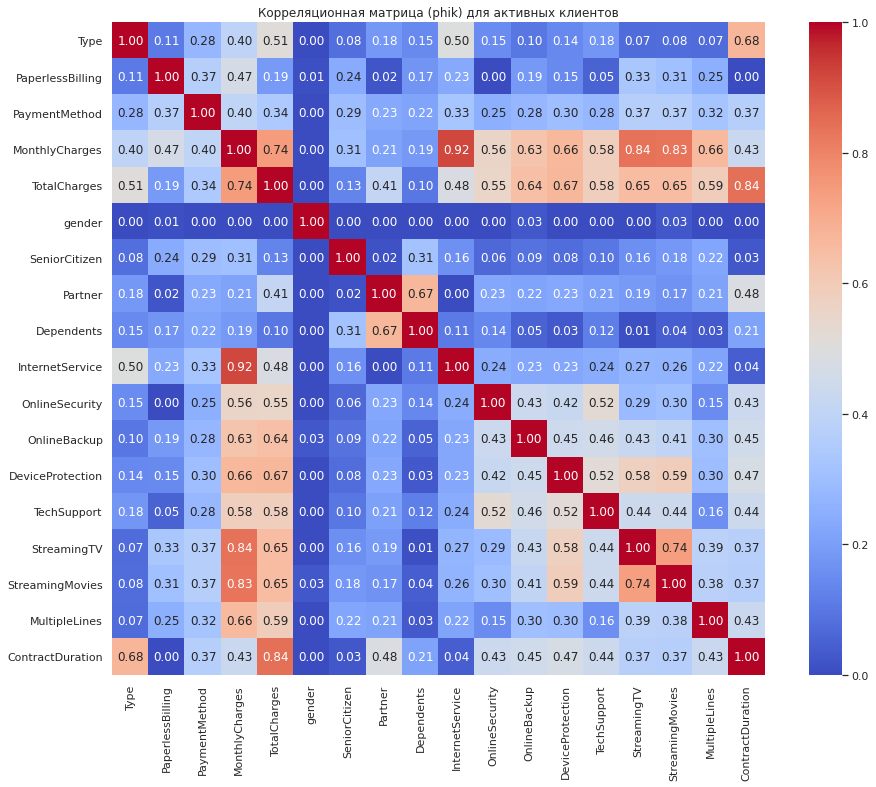

Text(0.5, 1.0, 'Корреляционная матрица (phik) для ушедших клиентов')

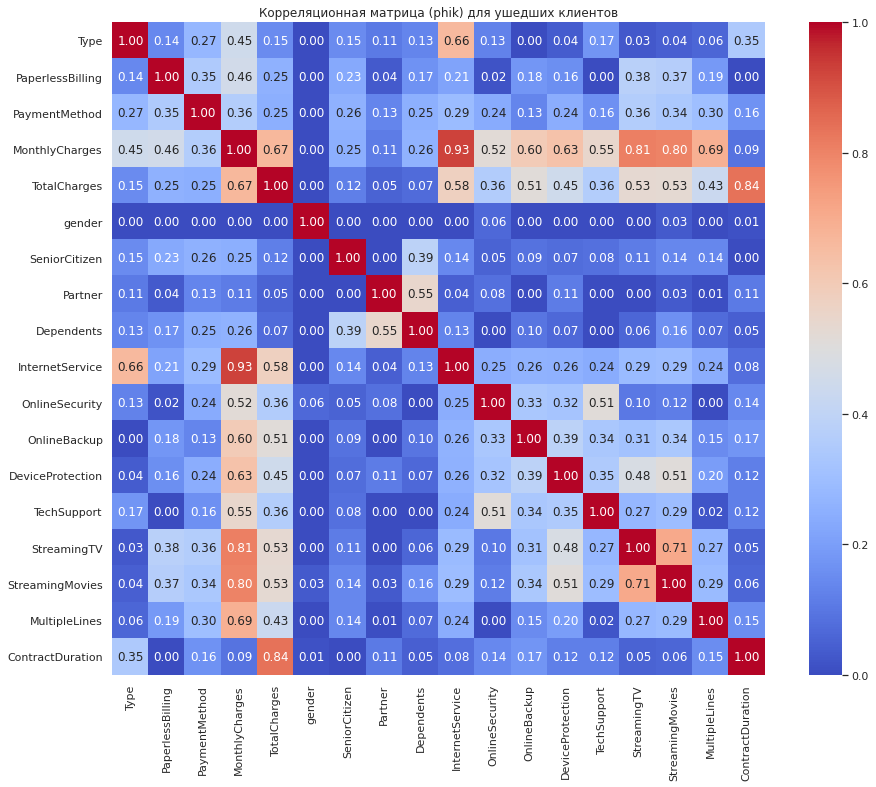

In [55]:
# Удаляем ненужные столбцы из датафреймов активных и ушедших клиентов
active_clients_cleaned = active_clients.drop(columns=['customerID', 'BeginDay', 'Churn'], errors='ignore')
churned_clients_cleaned = churned_clients.drop(columns=['customerID', 'BeginDay', 'Churn'], errors='ignore')

# Вычисление корреляционной матрицы для активных клиентов
active_corr = active_clients_cleaned.phik_matrix(interval_cols=['MonthlyCharges', 'TotalCharges', 'ContractDuration'])

# Вычисление корреляционной матрицы для ушедших клиентов
churned_corr = churned_clients_cleaned.phik_matrix(interval_cols=['MonthlyCharges', 'TotalCharges', 'ContractDuration'])

# Визуализация корреляционной матрицы для активных клиентов
plt.figure(figsize=(16, 12))
sns.heatmap(active_corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Корреляционная матрица (phik) для активных клиентов')
plt.show()

# Визуализация корреляционной матрицы для ушедших клиентов
plt.figure(figsize=(16, 12))
sns.heatmap(churned_corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Корреляционная матрица (phik) для ушедших клиентов')

**Сравнение активных и ушедших клиентов**

- **Сравнение корреляций**: Активные клиенты имеют более высокие значения корреляции между расходами и типами услуг по сравнению с ушедшими клиентами. 
-  **У активных клиентов заметная корреляция между годом начала обслуживания и общей суммой платежей.**
- **Низкая корреляция с `SeniorCitizen`**: В обеих группах наблюдается низкая корреляция с переменной `SeniorCitizen`, что может указывать на то, что возраст не является решающим фактором для ухода.


In [56]:
correlation_matrix = data.corr()
churn_correlation = correlation_matrix['Churn'].sort_values(ascending=False)
print(churn_correlation)

Churn               1.000000
MonthlyCharges      0.153927
TotalCharges        0.051548
ContractDuration    0.015716
Name: Churn, dtype: float64


In [57]:
print(data.dtypes)


customerID           object
Type                 object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
MultipleLines        object
Churn                 int64
ContractDuration      int64
dtype: object


1. **Общие расходы**: Имеют наибольшее влияние на отток клиентов.

2. **Продолжительность контракта**: Длительные контракты снижают вероятность оттока, так как клиенты более привязаны к компании. Удержание клиентов и предложение долгосрочных контрактов могут быть эффективными стратегиями.

3. **Год начала обслуживания**: Разные годы подписки могут отражать различные уровни удовлетворенности клиентов.

4. **Ежемесячные расходы**: Хотя влияние меньше, чем у общих расходов и длительности контракта, они все равно важны.

5. **Месяц начала обслуживания**: Может иметь значение, особенно если в определенные месяцы были специальные предложения.

6. **Отсутствие нескольких линий**: Указывает на предпочтения клиентов и их потребности в услугах.

7. **Типы контрактов**: Контракт "Month-to-month" способствует большему оттоку, так как клиенты имеют больше свободы.

8. **Методы оплаты**: Разные методы могут влиять на отток клиентов.

9. **Дополнительные услуги**: Ушедшие клиенты часто использовали дополнительные услуги, но могли ожидать большего.

10. **Пол и возраст**: Пропорции мужчин и женщин схожи, но среди ушедших клиентов немного больше мужчин. Пожилые клиенты могут быть менее удовлетворены услугами, что стоит учитывать в стратегии удержания.

* Признаки, которые следует оставить:
1. **Числовые признаки**:
   - **TotalCharges**: Общие расходы.
   - **ContractDuration**: Продолжительность контракта.
   - **MonthlyCharges**: Ежемесячные расходы.
  

2. **Категориальные признаки** (после применения OneHotEncoding):
   - **Type**: Тип контракта (Month-to-month, One year, Two year).
   - **PaperlessBilling**: Использование безбумажного биллинга.
   - **PaymentMethod**: Метод оплаты (Electronic check, Credit card (automatic), Bank transfer (automatic), Mailed check).
   - **gender**: Пол клиента.
   - **SeniorCitizen**: Статус пожилого клиента (Yes/No).
   - **Partner**: Наличие партнера (Yes/No).
   - **Dependents**: Наличие зависимых (Yes/No).
   - **InternetService**: Тип интернет-услуги (DSL, Fiber optic, No).
   - **OnlineSecurity**: Наличие онлайн-защиты (Yes/No).
   - **OnlineBackup**: Наличие онлайн-резервного копирования (Yes/No).
   - **DeviceProtection**: Наличие защиты устройства (Yes/No).
   - **TechSupport**: Наличие технической поддержки (Yes/No).
   - **StreamingTV**: Наличие услуги потокового телевидения (Yes/No).
   - **StreamingMovies**: Наличие услуги потокового кино (Yes/No).
   - **MultipleLines**: Наличие нескольких линий (Yes/No).

* Признаки, которые следует исключить:
1. **customerID**: Идентификатор клиента (неинформативен для модели).
2. **Churn**: Целевая переменная.

## Шаг 5: Подготовка данных

In [58]:
data = data.drop(['customerID'], axis=1)
print('Количество явных дубликатов:',data.duplicated().sum())
data.head()

Количество явных дубликатов: 4


,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Churn,ContractDuration
0,Month-to-month,Yes,Electronic check,29.85,31.04,Female,No,Yes,No,DSL,No,Yes,No,No,No,No,No,0,31
1,One year,No,Mailed check,56.95,2071.84,Male,No,No,No,DSL,Yes,No,Yes,No,No,No,No,0,1036
2,Month-to-month,Yes,Mailed check,53.85,226.17,Male,No,No,No,DSL,Yes,Yes,No,No,No,No,No,0,123
3,One year,No,Bank transfer (automatic),42.30,1960.60,Male,No,No,No,DSL,Yes,No,Yes,Yes,No,No,No,0,1371
4,Month-to-month,Yes,Electronic check,70.70,353.50,Female,No,No,No,Fiber optic,No,No,No,No,No,No,No,0,153


In [59]:
data = data.drop_duplicates().reset_index(drop=True)
print('Количество явных дубликатов:',data.duplicated().sum())

Количество явных дубликатов: 0


In [60]:
X = data.drop(['Churn'], axis=1)
y = data['Churn']

In [61]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE, stratify=y)
print(X_train.shape, y_train.shape,
      X_test.shape,y_test.shape)

(5271, 18) (5271,) (1757, 18) (1757,)


In [62]:
# Определяем категориальные и числовые признаки
categorical_features = ['SeniorCitizen', 'Partner', 'Dependents', 'PaperlessBilling', 
                        'PaymentMethod', 'TechSupport', 'MultipleLines', 'InternetService', 
                        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                        'StreamingTV', 'StreamingMovies', 'Type', 'gender']
numerical_features = ['MonthlyCharges', 'TotalCharges', 'ContractDuration']


In [63]:
# Пайплайн для обработки категориальных признаков
ohe_pipe = Pipeline([
    ('simpleImputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Пайплайн для обработки числовых признаков
num_pipe = Pipeline([
    ('scaler', StandardScaler())
])

# Преобразователь данных
data_preprocessor = ColumnTransformer(
    transformers=[
        ('cat', ohe_pipe, categorical_features),
        ('num', num_pipe, numerical_features)
    ]
)
# Пайплайн для RandomForestClassifier
rf_pipeline = Pipeline([
    ('preprocessor', data_preprocessor),
    ('classifier', RandomForestClassifier(random_state=RANDOM_STATE))
])

# Пайплайн для CatBoostClassifier
cat_pipeline = Pipeline([
    ('preprocessor', data_preprocessor),
    ('classifier', CatBoostClassifier(random_seed=RANDOM_STATE, verbose=0))
])

## Шаг 6: Обучение моделей машинного обучения

In [64]:
# Определение параметров для GridSearchCV
param_grid_rf = {
    'classifier__n_estimators': [50, 100, 150, 200],
    'classifier__max_depth': [5, 10, 15, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Использование StratifiedKFold для кросс-валидации
skf = StratifiedKFold(n_splits=5)

# GridSearchCV для RandomForestClassifier
grid_search_rf = GridSearchCV(rf_pipeline, param_grid_rf, scoring='roc_auc', cv=skf)
grid_search_rf.fit(X_train, y_train)

# Вывод лучших параметров и метрики
print("Лучшие параметры для RandomForestClassifier:", grid_search_rf.best_params_)
print("Лучший ROC AUC на кросс-валидации для RandomForestClassifier:", grid_search_rf.best_score_)

Лучшие параметры для RandomForestClassifier: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Лучший ROC AUC на кросс-валидации для RandomForestClassifier: 0.8270048390720053


In [65]:
#Код ментора
grid_search_rf.best_score_

0.8270048390720053

In [66]:
param_grid_cat = {
    'classifier__iterations': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.03, 0.05, 0.1],
    'classifier__depth': [4, 6, 8, 10],
    'classifier__l2_leaf_reg': [1, 3, 5, 7]
}

# GridSearchCV для CatBoostClassifier с использованием StratifiedKFold
grid_search_cat = GridSearchCV(cat_pipeline, param_grid_cat, scoring='roc_auc', cv=skf)
grid_search_cat.fit(X_train, y_train)

# Вывод лучших параметров и метрики
print("Лучшие параметры для CatBoostClassifier:", grid_search_cat.best_params_)
print("Лучший ROC AUC на кросс-валидации для CatBoostClassifier:", grid_search_cat.best_score_)

Лучшие параметры для CatBoostClassifier: {'classifier__depth': 4, 'classifier__iterations': 300, 'classifier__l2_leaf_reg': 1, 'classifier__learning_rate': 0.1}
Лучший ROC AUC на кросс-валидации для CatBoostClassifier: 0.9010932943349224


In [67]:
#Код ментора
grid_search_cat.best_score_

0.9010932943349224

## Шаг 7: Выбор лучшей модели

In [70]:
# Сравнение ROC AUC для обеих моделей
print("ROC AUC для RandomForestClassifier:", grid_search_rf.best_score_)
print("ROC AUC для CatBoostClassifier:", grid_search_cat.best_score_)

if grid_search_rf.best_score_ > grid_search_cat.best_score_:
    print("RandomForestClassifier показал лучший результат.")
elif grid_search_cat.best_score_ > grid_search_rf.best_score_ :
    print("CatBoostClassifier показал лучший результат.")
else:
    print("Обе модели показали одинаковый результат.")

ROC AUC для RandomForestClassifier: 0.8270048390720053
ROC AUC для CatBoostClassifier: 0.9010932943349224
CatBoostClassifier показал лучший результат.


In [71]:
# Обучение CatBoostClassifier с лучшими параметрами
best_cat_pipeline = grid_search_cat.best_estimator_
best_cat_pipeline.fit(X_train, y_train)

# Прогнозирование вероятностей на тестовой выборке
cat_proba = best_cat_pipeline.predict_proba(X_test)[:, 1]

# Оценка ROC AUC
cat_auc = roc_auc_score(y_test, cat_proba)
print(f'CatBoostClassifier - ROC AUC на тестовой выборке: {cat_auc:.4f}')

CatBoostClassifier - ROC AUC на тестовой выборке: 0.9052


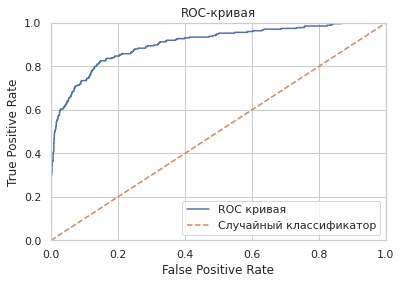

In [72]:
# Вычисление значений для ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, cat_proba) 
# Визуализация ROC-кривой
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='ROC кривая')
plt.plot([0, 1], [0, 1], linestyle='--', label='Случайный классификатор')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend()
plt.show()

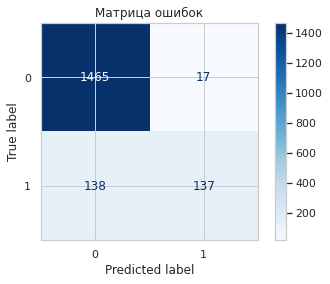

In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = best_cat_pipeline.predict(X_test)

# Создаем матрицу ошибок
cm = confusion_matrix(y_test, y_pred)

# Отображаем матрицу ошибок
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_cat_pipeline.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Матрица ошибок')
plt.show()

<AxesSubplot:>

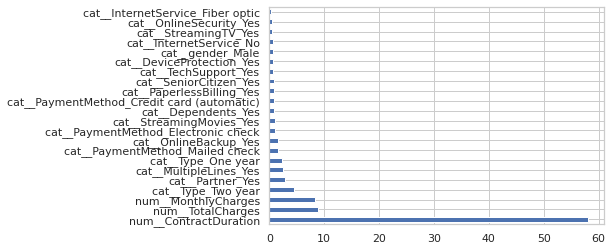

In [74]:
#Код ментора
(pd.Series(best_cat_pipeline['classifier'].feature_importances_, index=best_cat_pipeline['preprocessor'].get_feature_names_out() )
   .nlargest(30)
   .plot(kind='barh'))


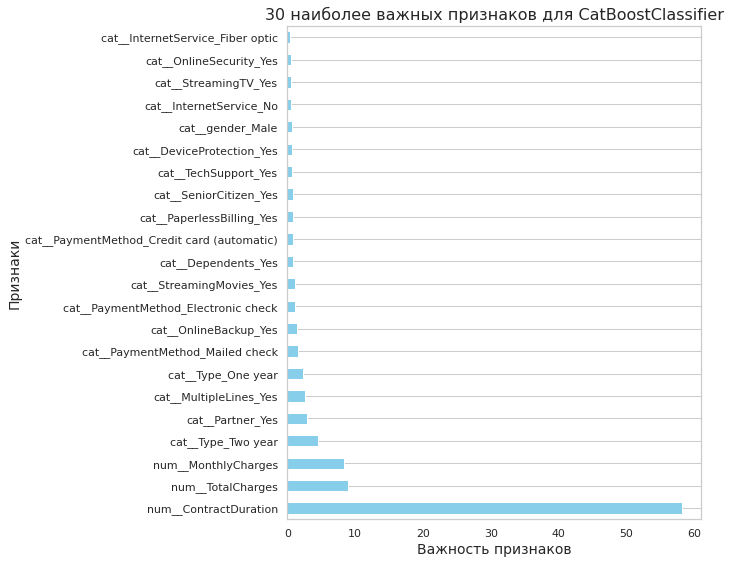

num__ContractDuration                         58.140312
num__TotalCharges                              8.938585
num__MonthlyCharges                            8.323997
cat__Type_Two year                             4.558774
cat__Partner_Yes                               2.823483
cat__MultipleLines_Yes                         2.526032
cat__Type_One year                             2.254112
cat__PaymentMethod_Mailed check                1.582514
cat__OnlineBackup_Yes                          1.480325
cat__PaymentMethod_Electronic check            1.044061
cat__StreamingMovies_Yes                       1.041638
cat__Dependents_Yes                            0.880363
cat__PaymentMethod_Credit card (automatic)     0.846676
cat__PaperlessBilling_Yes                      0.826416
cat__SeniorCitizen_Yes                         0.772922
cat__TechSupport_Yes                           0.726582
cat__DeviceProtection_Yes                      0.700116
cat__gender_Male                               0

In [77]:
# Получение важности признаков
feature_importances = pd.Series(best_cat_pipeline['classifier'].feature_importances_,
                                  index=best_cat_pipeline['preprocessor'].get_feature_names_out())

# Выбор 30 наиболее важных признаков
top_features = feature_importances.nlargest(30)

# Настройка графика
plt.figure(figsize=(10, 8))  # Увеличение размера графика
top_features.plot(kind='barh', color='skyblue')  # Использование цветовой схемы
plt.title('30 наиболее важных признаков для CatBoostClassifier', fontsize=16)  # Заголовок
plt.xlabel('Важность признаков', fontsize=14)  # Метка оси X
plt.ylabel('Признаки', fontsize=14)  # Метка оси Y
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Добавление сетки для лучшей читаемости
plt.tight_layout()  # Автоматическая подстройка элементов графика

# Сохранение графика в файл
plt.savefig('feature_importance_catboost.png', dpi=300)

# Показ графика
plt.show()
top_features

### Важность признаков:

1. **ContractDuration (58.14%)**:
   - Наиболее важный признак, который указывает на то, что клиенты с более длительными контрактами имеют меньшую вероятность ухода. 
2. **TotalCharges (8.94%)**:
   - Общие расходы также играют значительную роль. Высокие общие расходы могут вызывать недовольство у клиентов, особенно если они не видят соответствующей ценности в получаемых услугах.

3. **MonthlyCharges (8.32%)**:
   - Ежемесячные расходы также оказывают влияние на отток клиентов. Если клиенты считают, что они платят слишком много за свои услуги, они могут рассмотреть возможность перехода к конкурентам.

4. **Type (тип контракта)**:
   - **Type_Two year (4.56%)** и **Type_One year (2.25%)**: Долгосрочные контракты (например, на два года) снижают вероятность ухода, в то время как контракты на один год или меньше могут быть более подвержены оттоку.

5. **Partner (2.82%)**:
   - Наличие партнера у клиента также может снизить вероятность ухода, так как совместные расходы и услуги могут создать большую привязанность к компании.

6. **MultipleLines (2.53%)**:
   - Наличие нескольких линий связи также может указывать на большую зависимость клиента от услуг компании.

7. **Методы оплаты**:
   - **PaymentMethod_Mailed check (1.58%)** и **PaymentMethod_Electronic check (1.04%)**: Разные методы оплаты могут влиять на удобство для клиентов и, соответственно, на их удовлетворенность.

8. **Дополнительные услуги**:
   - Признаки, такие как **OnlineBackup (1.48%)**, **StreamingMovies (1.04%)**, **TechSupport (0.73%)**, и другие, показывают, что клиенты, использующие дополнительные услуги, могут ожидать большего от своей подписки, что также может повлиять на их решение остаться или уйти.

9. **Возраст и пол**:
   - Признаки, такие как **SeniorCitizen (0.77%)** и **gender_Male (0.66%)**, имеют низкую, но все же заметную важность, что может указывать на то, что возраст и пол не являются решающими факторами для ухода, но все же могут влиять на удовлетворенность клиентов.


## Шаг 8: Общий вывод и рекомендации

### Общий вывод и рекомендации по проекту "Прогнозирование оттока клиентов оператора связи «ТелеДом»"

* 1. Результаты анализа данных
В ходе выполнения проекта была проведена комплексная работа по анализу и предобработке данных, а также обучению моделей машинного обучения для прогнозирования оттока клиентов. Основные выводы:

- **Обработка данных**: Все данные были успешно загружены и объединены. Проблемы с пропусками были решены путем заполнения значений, что позволило сохранить целостность данных. 
- **Исследовательский анализ**: Выявлены ключевые факторы, влияющие на отток клиентов, такие как ежемесячные расходы, длительность контракта и тип интернет-услуг. 
- **Модели машинного обучения**: Обучены две модели — Random Forest и CatBoost. Наилучшие результаты показала модель CatBoost с ROC AUC на тестовой выборке равным 0.9052.

* 2. Важность признаков
Анализ важности признаков показал:
1. **ContractDuration (58.14%)**:
   - Наиболее важный признак, который указывает на то, что клиенты с более длительными контрактами имеют меньшую вероятность ухода. 
2. **TotalCharges (8.94%)**:
   - Общие расходы также играют значительную роль. Высокие общие расходы могут вызывать недовольство у клиентов, особенно если они не видят соответствующей ценности в получаемых услугах.

3. **MonthlyCharges (8.32%)**:
   - Ежемесячные расходы также оказывают влияние на отток клиентов. Если клиенты считают, что они платят слишком много за свои услуги, они могут рассмотреть возможность перехода к конкурентам.

### Рекомендации для бизнеса

На основе проведенного анализа данных и выявленных факторов, влияющих на отток клиентов, предлагаются следующие рекомендации для оператора связи «ТелеДом»:

1. **Оптимизация условий контрактов**:
   - Рассмотреть возможность введения более гибких условий для краткосрочных контрактов, чтобы привлечь новых клиентов и удерживать существующих. Например, предложить клиентам возможность выбора между разными сроками контракта с соответствующими скидками или бонусами.

2. **Персонализированные предложения**:
   - Использовать данные о клиентах для создания персонализированных предложений, направленных на удержание клиентов с высоким риском оттока. Например, предлагать скидки или дополнительные услуги тем, кто имеет высокие ежемесячные расходы или короткие сроки контракта.

3. **Улучшение качества обслуживания**:
   - Инвестировать в обучение сотрудников по работе с клиентами, чтобы повысить уровень обслуживания и удовлетворенности клиентов. Это поможет снизить уровень оттока и повысить лояльность.

4. **Мониторинг и анализ данных**:
   - Регулярно проводить мониторинг ключевых показателей, таких как отток клиентов, уровень удовлетворенности и использование услуг. Использовать эти данные для оперативного реагирования на изменения в поведении клиентов и корректировки стратегии.

### Заключение

Проект по прогнозированию оттока клиентов оператора связи «ТелеДом» продемонстрировал важность анализа данных и применения машинного обучения для повышения уровня удержания клиентов. Реализация предложенных рекомендаций может существенно снизить уровень оттока и улучшить финансовые показатели компании.